<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Marks,

I have checked you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear for you :)

You did a good job 😀. You  understand what you are doing and why, also can make right conclusions - which is great 👍.

However, I can't accept this project yet. Please, go through the comments inside and correct respective parts or provide sufficient explanations.

***Good luck!***

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Thank you for responding to my comments :) 

Comments on this version are in such cells.

Project is accepted.

------------

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
# pd.options.mode.chained_assignment = None  # default='warn'
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Conclusion

As we can see we have 22 columns of different type (floats, int, objcets). 14/22 columns contain missing values that need to be dealt with. Also, it is clear that some columns should have their data type changed - for example: parks_around3000 should be an in integer as you can not have 1.4 parks. I will change the columns dateType where appropriate when I fill in the missing values. In terms of the below instrucor's comment, I analysed every column in more depth, which allowed me to fill in the missing data in "more" correct way than the way I did in my first attempt.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Great, now we have data to work with 😎

It seems like you forgot to write conclusion to this part :( Please, state all problems that you have discovered or indicate that there are no problems :) 

To study general information about any dataset you just need to:
* show first several rows of the dataset to check that data loaded correclty (use method `.head()`)
* show general information about the dataset (using method `.info()` as you did 🤓)

Also, you may want to study values that each column contains. To do that you can calculate number of appearances of each unique value in this column (as you did 😀). However, this approach is only suitable for qualitative or cathegorical data. For quantitative data method `.describe()` is more suitable. It shows some descriptive statistics and helps to learn range of values in the column.

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Great :)

------------

### Step 2. Data preprocessing

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
from matplotlib import pyplot as plt
df_copy = df.copy()

# before proceeding with the analysis, I created a function that calculates stats of a given column - will definitely be needed
def column_stats(data_sclice, column_name, stat):
    if stat == 'mean':
        x = data_sclice[column_name].mean()
    if stat == 'median':
        x = data_sclice[column_name].median()
    if stat == 'std':
        x = data_sclice[column_name].std()
    return x

# this function gives a good summary of a numerical column
def column_info(dataFrame, column_name):
    plt.hist(dataFrame[column_name], bins = 50)
    plt.grid()
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.title('%s histogram' %column_name)
    
    print('\nDescriptive Stats: \n', dataFrame[column_name].describe())
    print('\nFirst 5 rows of the dataSet: \n', dataFrame[column_name].head())
    print('\nNumber of missing value in the dataSet:', dataFrame[column_name].isnull().sum())

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)



Descriptive Stats: 
 count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

First 5 rows of the dataSet: 
 0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64

Number of missing value in the dataSet: 9195


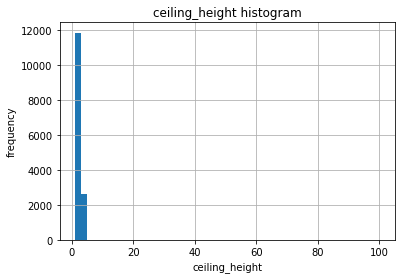

In [3]:
########################### Dealing with ceiling_height ####################################################
column_info(df, 'ceiling_height')

So we can see that 'ceiling_height' mean of 2.77 is close to the quartile median values, meaning that data is not skewed and a mean value is a good representation of the set. We can clearly see there are major outliers in this dataSet; hence, the histogram is plotted on a bad x-range. Let us first, fill in the missing values with the mean and then filter out the data by values of 2 and 4.5. Some basic Yandex search showed that in most countries min ceiling height is 2 m and 4.5 seems like a good upper limit that will allows to better see the histogram. Note, filtering will drop rows, so in order to ensure that this outlier filtering does not drop too many rows let us count how many values are "sliced" away. In terms of acceptable value, since we are working with a very large dataSet (20K+ rows) - slicing away no more than 200 outliers ( which is 1 %) will be deemed OK.

Number of rows dropped due to filtering: 45

Descriptive Stats: 
 count    23654.000000
mean         2.742819
std          0.211217
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.500000
Name: ceiling_height, dtype: float64

First 5 rows of the dataSet: 
 0    2.700000
1    2.771499
2    2.771499
3    2.771499
4    3.030000
Name: ceiling_height, dtype: float64

Number of missing value in the dataSet: 0


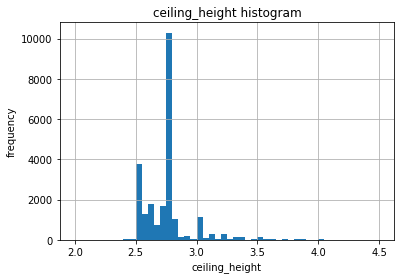

In [4]:
column_name = 'ceiling_height'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 4.5) 
                                          & (df[column_name] >=2)][column_name].count())

df['ceiling_height'] = df['ceiling_height'].fillna(column_stats(df, 'ceiling_height', 'mean'))
df = df[(df['ceiling_height'] <= 4.5) & (df['ceiling_height'] >=2)]
column_info(df, 'ceiling_height')

We only sliced away 45 values but it helped a lot to visualize the data in this column. Now let us see what this filling method and slicing did to our stats and how they differ from that or unmodified column. The function below calculates the % difference between the descriptive stats of the original column (df_copy) and the modified (df which is filled in and sliced) to give us an understanding whether our analysis messed with the statistics too much..

In [5]:
def stats_delta(column_name):
    df_stats1 = pd.DataFrame(df_copy[column_name].describe())
    df_stats2 = pd.DataFrame(df[column_name].describe())
    df_stats1.reset_index(inplace = True)
    df_stats2.reset_index(inplace = True)
    df_stats1['%s_modfied' % column_name] = df_stats2[column_name]
    df_stats1['% Difference'] = ((df_stats1[column_name] - df_stats2[column_name])/df_stats1[column_name]).abs() *100
    print(df_stats1)
    
    
    
stats_delta('ceiling_height')

   index  ceiling_height  ceiling_height_modfied  % Difference
0  count    14504.000000            23654.000000     63.086045
1   mean        2.771499                2.742819      1.034797
2    std        1.261056                0.211217     83.250771
3    min        1.000000                2.000000    100.000000
4    25%        2.520000                2.600000      3.174603
5    50%        2.650000                2.771499      4.584864
6    75%        2.800000                2.771499      1.017897
7    max      100.000000                4.500000     95.500000


The count increased from 14504 to 23654, which means that filling method worked. Also, the filling method preserved the mean value to a very high accuaracy - 1.03 % change. Std as exepcted changed as we got rid off those very large outliers. The minimum value changed as we said min value should be 2 m. Medians are also preserved with high accuaracy. Having preserved mean and median after filling in the missing values suggest the method worked well.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Okay :)

How much data is left in the dataset?

So, you decided to fill missing data with average ceiling height, right? Why have you chosen mean value? What is the value of the mean?

Please, describe and explain all your steps. Also, when you plot a graph you should set its title and name axis. Otherwise it is hard to get an idea of what is plotted :(

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Great :)

------------


Descriptive Stats: 
 count    23568.000000
mean        10.676341
std          6.593016
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

First 5 rows of the dataSet: 
 0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
Name: floors_total, dtype: float64

Number of missing value in the dataSet: 86


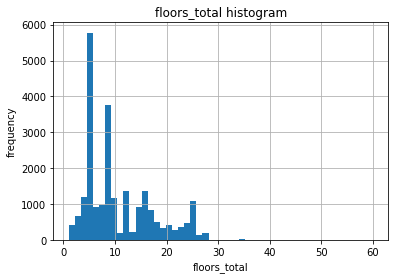

In [6]:
########################### Dealing with floors_total ####################################################
column_info(df, 'floors_total')

Unlike with the ceiling height column, here outliers are not as bad, which allows us to see the histogram fairly well straight away without it being on badly scaled x-axis. Some outlier(s) here seem to be at the value of around 35 - let us get rid of it. Also a maximum value of 60 is 6x times the mean value so also seems very large. Filtering the data by the value of 30 seems reasonable. Before doing this slicing let us see how many values would be dropped?

In fact, we can see that there are 24 instances of houses with 35 floors, which seems reasonable - https://ru.wikipedia.org/wiki/Князь_Александр_Невский_(жилой_комплекс) and 2 instances of 36 floors, which also seem OK now.
So, I will filter out the column by a value of 36, which would only result in deletion of 47 rows.

Number of rows dropped due to filtering: 47

Descriptive Stats: 
 count    23566.000000
mean        10.672494
std          6.579957
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

First 5 rows of the dataSet: 
 0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
Name: floors_total, dtype: float64

Number of missing value in the dataSet: 0


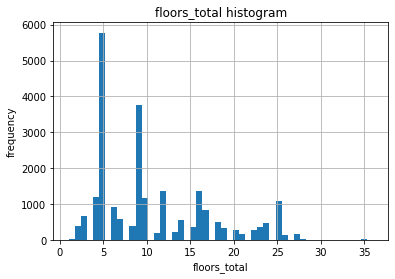

In [7]:
column_name = 'floors_total'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 36)][column_name].count())


df = df[(df['floors_total'] <= 36)]
column_info(df, 'floors_total')

In [8]:
stats_delta('floors_total')

   index  floors_total  floors_total_modfied  % Difference
0  count  23613.000000          23566.000000      0.199043
1   mean     10.673824             10.672494      0.012455
2    std      6.597173              6.579957      0.260961
3    min      1.000000              1.000000      0.000000
4    25%      5.000000              5.000000      0.000000
5    50%      9.000000              9.000000      0.000000
6    75%     16.000000             16.000000      0.000000
7    max     60.000000             36.000000     40.000000


Now, the histogram is very readable and we can see that in St.Petersburg there is a big variety of houses in terms of how many floors they have. In terms of the missing values - we only have 86 missing values, which is very little so we can drop them without much reservation. Note, that the missing values were already dropped thanks to data slicing, so we do not need to use dropna method here as it will not do anything. Also, as expected due to minimal work done to this column the stats are virtually unchanged.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Okay :)

How much data is left in the dataset?

It is hard to study this graph :(

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Great :)

------------


Descriptive Stats: 
 count    21699.000000
mean        34.421381
std         21.861911
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

First 5 rows of the dataSet: 
 0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64

Number of missing value in the dataSet: 1867


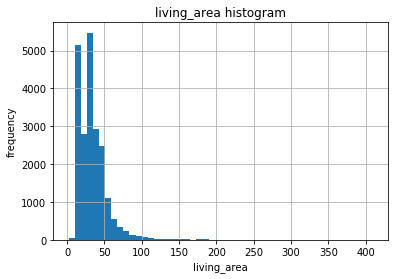

In [9]:
########################### Dealing with living_area ####################################################
column_info(df, 'living_area')

OK, In terms of filling the missing value let us create a column  that is the ratio between the living area and total area and see if the obtained ratios can give us an idea on how to fill in the missing data. Before, proceeding with the above - let us analyze the total_area column as it will be used in filling in the missing data in the living_area column.


Descriptive Stats: 
 count    23566.000000
mean        60.275683
std         35.366784
min         12.000000
25%         40.000000
50%         52.000000
75%         69.747500
max        900.000000
Name: total_area, dtype: float64

First 5 rows of the dataSet: 
 0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64

Number of missing value in the dataSet: 0


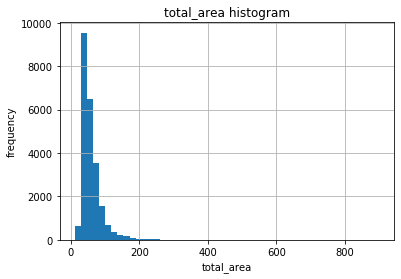

In [10]:
column_info(df, 'total_area')

So, we can see it was a good idea to investigate the total_area column as there are clearly strong outliers that stretch out the x-axis all the way to 1000 m^2. From the look of it we can filter the data by a value of 350. Also, no missing data - great!

Number of rows dropped due to filtering: 172

Descriptive Stats: 
 count    23527.000000
mean        59.627715
std         31.311782
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        347.500000
Name: total_area, dtype: float64

First 5 rows of the dataSet: 
 0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64

Number of missing value in the dataSet: 0
   index    total_area  total_area_modfied  % Difference
0  count  23699.000000        23527.000000      0.725769
1   mean     60.348651           59.627715      1.194618
2    std     35.654083           31.311782     12.178972
3    min     12.000000           12.000000      0.000000
4    25%     40.000000           40.000000      0.000000
5    50%     52.000000           52.000000      0.000000
6    75%     69.900000           69.500000      0.572246
7    max    900.000000          347.500000     61.388889


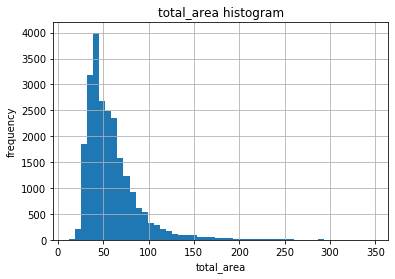

In [11]:
column_name = 'total_area'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 350)][column_name].count())

df = df[(df['total_area'] <= 350)]
column_info(df, 'total_area')
stats_delta('total_area')

We can see that filtering the data by value of 350 only rids off 172 data points (within our set limit 1%) and allows us to better vizualise the histogram and understand its limits. The stats are well preserved with the only exception of std, which makes sense as we slashed our max value from 900 to 347. Having "dealt" with total area column let us now proceed with filling in the missing values in the living area column.


Descriptive Stats: 
 count    21671.000000
mean         0.564900
std          0.105185
min          0.021583
25%          0.495384
50%          0.568182
75%          0.637900
max          1.000000
Name: living_to_total, dtype: float64

First 5 rows of the dataSet: 
 0    0.472222
1    0.460396
2    0.612500
3         NaN
4    0.320000
Name: living_to_total, dtype: float64

Number of missing value in the dataSet: 1856


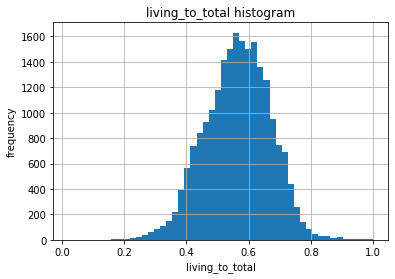

In [12]:
df['living_to_total'] = df['living_area'] / df['total_area']
df_copy['living_to_total'] = df['living_to_total'] # adding newly created column to the copy of df for reference
column_info(df, 'living_to_total')

Here we have a normally distributed sample so we can legitimately use both the mean or the median as our measure of central tendency. In fact, in any symmetrical distribution the mean, median and mode are equal (they are very close in this example). However, in this situation, the mean is widely preferred as the best measure of central tendency because it is the measure that includes all the values in the data set for its calculation, and any change in any of the scores will affect the value of the mean. So let us fill in the missing values for the living area as the product of mean of df['living_to_total'] column and total area. Before, let us fill in the missing data for the living_to_total column - here we will use the mean.


Descriptive Stats: 
 count    23527.000000
mean         0.564900
std          0.100951
min          0.021583
25%          0.500000
50%          0.564900
75%          0.631780
max          1.000000
Name: living_to_total, dtype: float64

First 5 rows of the dataSet: 
 0    0.472222
1    0.460396
2    0.612500
3    0.564900
4    0.320000
Name: living_to_total, dtype: float64

Number of missing value in the dataSet: 0
   index  living_to_total  living_to_total_modfied  % Difference
0  count     21671.000000             23527.000000  8.564441e+00
1   mean         0.564900                 0.564900  3.930689e-14
2    std         0.105185                 0.100951  4.025599e+00
3    min         0.021583                 0.021583  0.000000e+00
4    25%         0.495384                 0.500000  9.317126e-01
5    50%         0.568182                 0.564900  5.775965e-01
6    75%         0.637900                 0.631780  9.594643e-01
7    max         1.000000                 1.000000  0.000000e

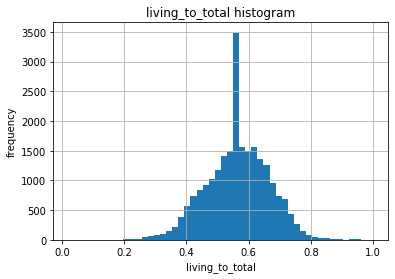

In [13]:
df['living_to_total'] = df['living_to_total'].fillna(column_stats(df, 'living_to_total', 'mean'))
column_info(df, 'living_to_total')
stats_delta('living_to_total')

No missing values + stats are very well preserved!


Descriptive Stats: 
 count    23527.000000
mean        34.174078
std         20.216849
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        260.000000
Name: living_area, dtype: float64

First 5 rows of the dataSet: 
 0    51.000000
1    18.600000
2    34.300000
3    89.819103
4    32.000000
Name: living_area, dtype: float64

Number of missing value in the dataSet: 0


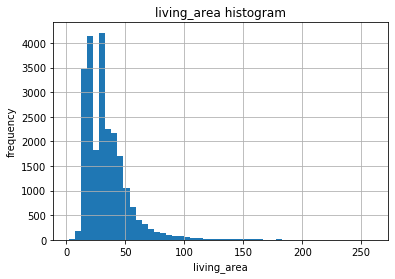

In [14]:
mean_df = df['living_to_total'].mean()
df['living_area'] = df.apply(lambda x: x['total_area']*mean_df if pd.isnull(x['living_area']) else x['living_area'], axis=1)

column_info(df, 'living_area')

Ok, looks good but now let us see what did this "ratio" method do to our original statistics using the stats_delta function

In [15]:
stats_delta('living_area')

   index   living_area  living_area_modfied  % Difference
0  count  21796.000000         23527.000000      7.941824
1   mean     34.457852            34.174078      0.823542
2    std     22.030445            20.216849      8.232227
3    min      2.000000             2.000000      0.000000
4    25%     18.600000            19.000000      2.150538
5    50%     30.000000            30.000000      0.000000
6    75%     42.300000            42.000000      0.709220
7    max    409.700000           260.000000     36.538931


Good, we can see that our "core" stats (mean+medians) have been very well perserved - std difference is fine, again this is because we got rid of the outlier reducing our max value. We can state that using the ratio method to fill in the missing values in the living area column worked well.

As a last check - let us ensure that living area does not exceed the total area as it did using the above method.


Descriptive Stats: 
 count    23527.000000
mean        25.453638
std         14.102539
min          0.000000
25%         17.000000
50%         22.000000
75%         29.000000
max        229.900000
Name: total_minus_living, dtype: float64

First 5 rows of the dataSet: 
 0    57.000000
1    21.800000
2    21.700000
3    69.180897
4    68.000000
Name: total_minus_living, dtype: float64

Number of missing value in the dataSet: 0


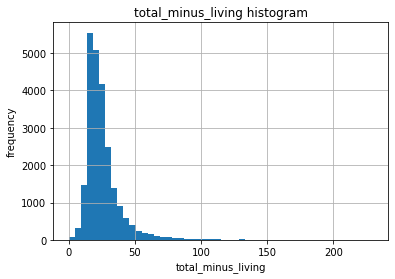

In [16]:
df['total_minus_living'] = df.total_area - df.living_area
column_info(df, 'total_minus_living')

As you can see the min value is 0, which is possible due to an apartemnt being a studio-like where your living area would be equal to your total area.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Okay, but what if living area now exceeds total area of the place?

It is hard to study this graph :(

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Great :)

Would also be great to take into account types of ads (studio, open plan, apartment) when filling missing values.

------------


Unique Values: 
 False    2711
True       46
Name: is_apartment, dtype: int64

First 5 rows of the dataSet: 
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: is_apartment, dtype: object

Number of missing value in the dataSet: 20770


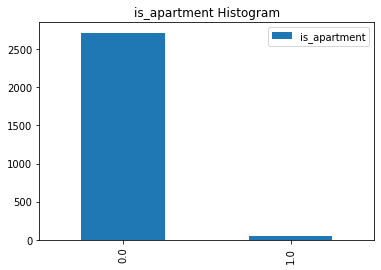

In [17]:
########################### Dealing with is_apartment ####################################################

def column_info_bool(dataFrame, column_name):
    pd.DataFrame(dataFrame[column_name].astype(float).value_counts()).plot(kind = 'bar', 
                                                                   title = '%s Histogram' % column_name)
    print('\nUnique Values: \n', dataFrame[column_name].value_counts())
    print('\nFirst 5 rows of the dataSet: \n', dataFrame[column_name].head())
    print('\nNumber of missing value in the dataSet:', dataFrame[column_name].isnull().sum())



column_info_bool(df, 'is_apartment')

We can see that pretty much the entire dataSet is empty (20753 missing values). Unique values are boolean.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Don't you think that this approach can skew the data? May it be that all missing values refer to non apartments? and they are missing just because some owners were lazy enough to specify that their place is not an apartment?

------------

As per the instructor's comments, I will treat the missing data as non apartemnts i.e. missing data = 0 = False. I agree with the above argument. 


Unique Values: 
 False    23481
True        46
Name: is_apartment, dtype: int64

First 5 rows of the dataSet: 
 0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

Number of missing value in the dataSet: 0


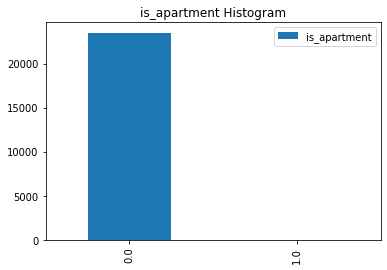

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)
column_info_bool(df, 'is_apartment')

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------


Descriptive Stats: 
 count    21315.000000
mean        10.514293
std          5.712628
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

First 5 rows of the dataSet: 
 0    25.0
1    11.0
2     8.3
3     NaN
4    41.0
Name: kitchen_area, dtype: float64

Number of missing value in the dataSet: 2212


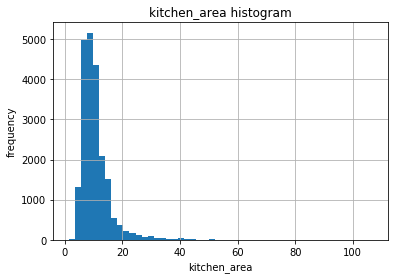

In [19]:
########################### Dealing with kitchen_area ####################################################
column_info(df, 'kitchen_area')

Here, we have 2212 missing values that we will be filling in the same way as with the living areaa, where we used ration between the total area and living area. Now let us see - should we filter the given column by a value of 60 (extremely rare occurances past 60) how many rows would we drop? 126 rows being dropped completely OK according to the set criteria.

In [20]:
column_name = 'kitchen_area'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 60)][column_name].count())

Number of rows dropped due to filtering: 126



Descriptive Stats: 
 count    21315.000000
mean         0.187477
std          0.072916
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232558
max          0.787879
Name: kitchen_to_total, dtype: float64

First 5 rows of the dataSet: 
 0    0.231481
1    0.272277
2    0.148214
3         NaN
4    0.410000
Name: kitchen_to_total, dtype: float64

Number of missing value in the dataSet: 2212


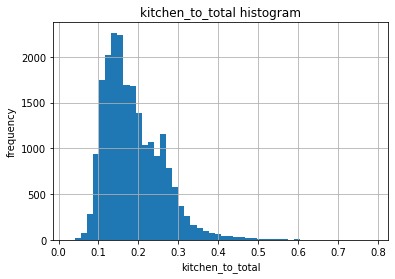

In [21]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df_copy['kitchen_to_total'] = df['kitchen_to_total'] # adding newly created column to the copy of df for reference
column_info(df, 'kitchen_to_total')

Here we have a normally distributed sample so we can legitimately use mean as our measure of central tendency. However, in this situation, the mean is widely preferred as the best measure of central tendency because it is the measure that includes all the values in the data set for its calculation, and any change in any of the scores will affect the value of the mean. So let us fill in the missing values for the kitchen area as the product of mean of df['kitchen_to_total'] column and total area - exactly the same way as with the living area.


Descriptive Stats: 
 count    23527.000000
mean        10.496797
std          5.769078
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

First 5 rows of the dataSet: 
 0    25.000000
1    11.000000
2     8.300000
3    29.808782
4    41.000000
Name: kitchen_area, dtype: float64

Number of missing value in the dataSet: 0


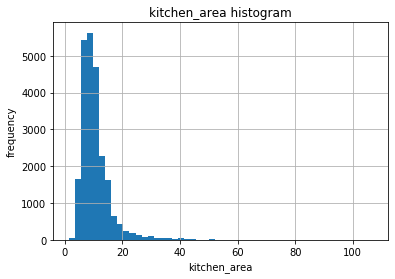

In [22]:
mean_df = df['kitchen_to_total'].mean()
df['kitchen_area'] = df.apply(lambda x: x['total_area']*mean_df if pd.isnull(x['kitchen_area']) else x['kitchen_area'], axis=1)
column_info(df, 'kitchen_area')

Ok looks, good - no missing values. Now let us remove the outlying values in the kitchen area dataSet - we can see that we can slice the data by a value of 60 as occureances past that are extremely rare.

Having filled in the data for df_kitchen let us compare it with the original stats and decide whether this filling method also worked for kitchen area


Descriptive Stats: 
 count    23507.000000
mean        10.442300
std          5.445748
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         60.000000
Name: kitchen_area, dtype: float64

First 5 rows of the dataSet: 
 0    25.000000
1    11.000000
2     8.300000
3    29.808782
4    41.000000
Name: kitchen_area, dtype: float64

Number of missing value in the dataSet: 0
   index  kitchen_area  kitchen_area_modfied  % Difference
0  count  21421.000000          23507.000000      9.738107
1   mean     10.569807             10.442300      1.206336
2    std      5.905438              5.445748      7.784182
3    min      1.300000              1.300000      0.000000
4    25%      7.000000              7.000000      0.000000
5    50%      9.100000              9.000000      1.098901
6    75%     12.000000             12.000000      0.000000
7    max    112.000000             60.000000     46.428571


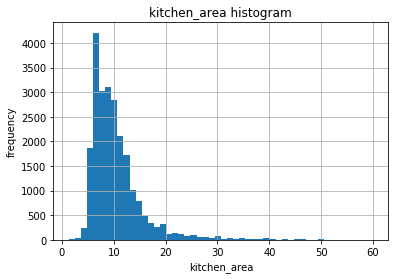

In [23]:
df = df[(df['kitchen_area'] <= 60)]
column_info(df, 'kitchen_area')
stats_delta('kitchen_area')

Looks good, we managed to fill in all the 2211 missing values in the same way (=consitent approach) as with the living area column whilst not skewing the data. 

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Same situation as with living area. What if now sum of living area and kitchen exeeds total area? 

------------


Descriptive Stats: 
 count    23507.000000
mean        49.071596
std         27.888098
min          5.720000
25%         30.000000
50%         43.000000
75%         58.000000
max        332.000000
Name: total_minus_kitchen, dtype: float64

First 5 rows of the dataSet: 
 0     83.000000
1     29.400000
2     47.700000
3    129.191218
4     59.000000
Name: total_minus_kitchen, dtype: float64

Number of missing value in the dataSet: 0


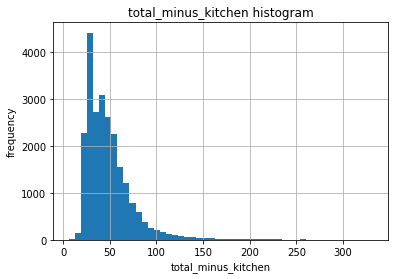

In [24]:
df['total_minus_kitchen'] = df.total_area - df.kitchen_area
column_info(df, 'total_minus_kitchen')

Min value = 5.72 m - all good, no kitchen area is > than total area.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------


Descriptive Stats: 
 count    12080.000000
mean         1.152152
std          1.067874
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

First 5 rows of the dataSet: 
 0    NaN
1    2.0
2    0.0
3    0.0
4    NaN
Name: balcony, dtype: float64

Number of missing value in the dataSet: 11427


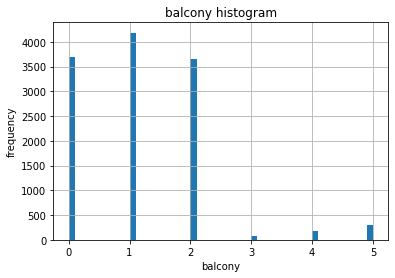

In [25]:
########################### Dealing with balcony ####################################################
column_info(df, 'balcony')

DataSet with 5 unique values with a large proportion of missing data.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Yeah, your functions for filling data are really good :)

Is it possible that missing data here refers to no balconies? (same situation as with the column "is_apartment")

It is hard to study this graph :(

------------

As per the instructor's comments, I will treat the missing data as no balconies i.e. missing data = 0. I agree with the above argument. 

   index       balcony  balcony_modfied  % Difference
0  count  12180.000000     23507.000000     92.996716
1   mean      1.150082         0.592079     48.518549
2    std      1.071300         0.957922     10.583255
3    min      0.000000         0.000000           NaN
4    25%      0.000000         0.000000           NaN
5    50%      1.000000         0.000000    100.000000
6    75%      2.000000         1.000000     50.000000
7    max      5.000000         5.000000      0.000000

Descriptive Stats: 
 count    23507.000000
mean         0.592079
std          0.957922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

First 5 rows of the dataSet: 
 0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64

Number of missing value in the dataSet: 0


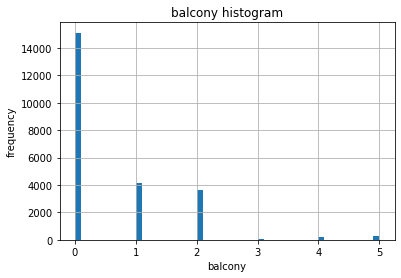

In [26]:
df['balcony'] = df['balcony'].fillna(0)
stats_delta('balcony')
column_info(df, 'balcony')

As we can see, Filling the missing data with 0 significantly skewed the statistics (i.e. 48% difference between means). However, I accept the instructor's argument about the balcony so will leave it like that. 

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------

In [27]:
########################### Dealing with locality_name ####################################################
df.dropna(subset=['locality_name'], inplace=True) # only 49 missing values here --> drop no problem
print(df.locality_name.value_counts().head())
print('The column contains %d rows' %int(len(df)))
print('Number of Unique localities is:', df.locality_name.nunique())

Санкт-Петербург    15565
посёлок Мурино       518
посёлок Шушары       439
Всеволожск           398
Пушкин               364
Name: locality_name, dtype: int64
The column contains 23459 rows
Number of Unique localities is: 363


Instructor's point "It will be weird if other observations in the same location are much closer or further to the airport than the one we observe" showed me that my analysis of filling the missing data with normally distibuted normal values was very wrong. So I will use the locality column when filling the missing data in the airports_nearest column. It is also important to note that we have no missing values in the locality column so good news here!


Descriptive Stats: 
 count    17952.000000
mean     28802.897282
std      12643.456824
min          0.000000
25%      18545.000000
50%      26765.500000
75%      37289.500000
max      84869.000000
Name: airports_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
Name: airports_nearest, dtype: float64

Number of missing value in the dataSet: 5507


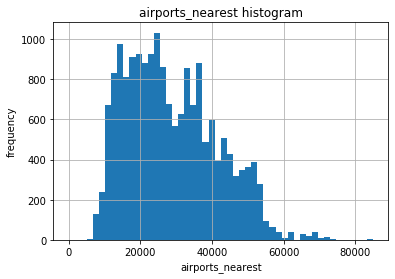

In [28]:
########################### Dealing with airports_nearest ####################################################
column_info(df, 'airports_nearest')

So, need to fill in 5515 missing values. I will be filling in the missing values using the distance_column function. The function takes 2 arguments column with missing data and stat, which can either be mean or median. First the function creates a new column in which it assigns a median or a mean to each unique locality - so that number of unique means/medians = number of unique locality names. The, the column of interest (i.e. 'airports_nearest')  empty values are filled with a median/mean value for each locality from the newly created stats column. However, a lot of localities do not have information on their distance to the airport at all (i.e. even if there is a group of 10 localities not a single row for that set contains airport distance). So this method will only fill in the missing values if at least 1 median/mean is available for 1 locality. To deal with the remaining missing values, they are grouped by a locality and are assigned a normally distributed value (airports nearest = normal distribution). So that 5 localities of x which have no info on airport distance will all be assigned the same random value.


Descriptive Stats: 
 count    23057.000000
mean     28607.326235
std      12272.914974
min          0.000000
25%      18748.000000
50%      26951.150787
75%      36627.000000
max      84869.000000
Name: airports_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
Name: airports_nearest, dtype: float64

Number of missing value in the dataSet: 0
   index  airports_nearest  airports_nearest_modfied  % Difference
0  count      18157.000000              23057.000000     26.986837
1   mean      28793.672193              28607.326235      0.647177
2    std      12630.880622              12272.914974      2.834051
3    min          0.000000                  0.000000           NaN
4    25%      18585.000000              18748.000000      0.877051
5    50%      26726.000000              26951.150787      0.842441
6    75%      37273.000000              36627.000000      1.733158
7    max      84869.000000              84869.00

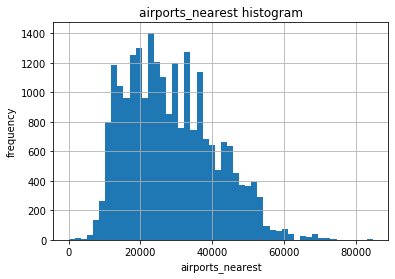

In [29]:
import numpy as np
def distance_column(column_to_be_filled):
    df['%s_mean' % (column_to_be_filled)] = df.groupby('locality_name')[column_to_be_filled].transform(lambda x: x.mean())
    df[column_to_be_filled] = df.apply(lambda x: x['%s_mean' % (column_to_be_filled)] if pd.isnull(x[column_to_be_filled]) 
                                      else x[column_to_be_filled], 
                                      axis=1)

    mu, sigma = column_stats(df, column_to_be_filled, 'mean'), column_stats(df, column_to_be_filled, 'std')
    df[column_to_be_filled] = df.groupby(['locality_name'])[column_to_be_filled].transform(
        lambda x: x.fillna(np.random.normal(mu, sigma)))
    df_copy['%s_mean' % (column_to_be_filled)] = df['%s_mean' % (column_to_be_filled)]
    return df


column_name = 'airports_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
column_info(df, column_name)
stats_delta(column_name)


No missing values - stats are very well preserved (<1 % difference in means and <5% difference in Q medians), the method chosen for fillin in the missing data works very well.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Good :)

------------


Descriptive Stats: 
 count    17973.000000
mean     14214.589996
std       8604.315304
min        181.000000
25%       9289.000000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64

Number of missing value in the dataSet: 5084


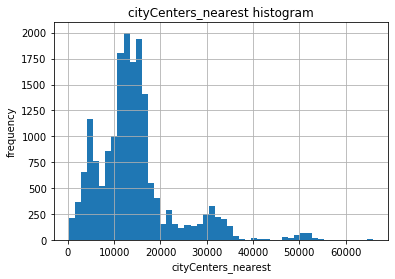

In [30]:
########################### Dealing with cityCenters_nearest ####################################################
column_info(df, 'cityCenters_nearest')

cityCenters_nearest will be dealt exactly in the same way as the airport disnance using the distnace_column function.


Descriptive Stats: 
 count    22970.000000
mean     14591.414440
std       8225.300571
min        181.000000
25%       9734.000000
50%      13736.000000
75%      17206.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64

Number of missing value in the dataSet: 0
   index  cityCenters_nearest  cityCenters_nearest_modfied  % Difference
0  count         18180.000000                 22970.000000     26.347635
1   mean         14191.277833                 14591.414440      2.819595
2    std          8608.386210                  8225.300571      4.450145
3    min           181.000000                   181.000000      0.000000
4    25%          9238.000000                  9734.000000      5.369128
5    50%         13098.500000                 13736.000000      4.866970
6    75%         16293.000000                 17206.500000      5.6

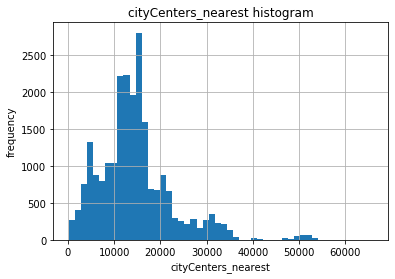

In [31]:
column_name = 'cityCenters_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
column_info(df, column_name)
stats_delta(column_name)

No missing values - stats are very well preserved (<2.5 % difference in means and <5% difference in Q medians woth the only exception of 25% Q median), the method chosen for filling in the missing data works well.


Descriptive Stats: 
 count    17974.000000
mean         0.608991
std          0.799975
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

First 5 rows of the dataSet: 
 0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
Name: parks_around3000, dtype: float64

Number of missing value in the dataSet: 4996


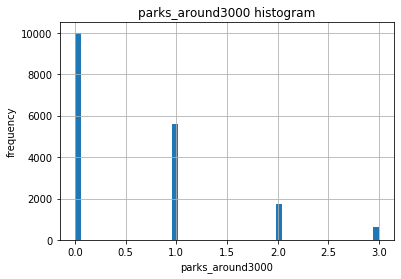

In [32]:
########################### Dealing with parks_around3000 ####################################################
column_info(df, 'parks_around3000')

Here, I will treat the missing data as no parks in 3km radius i.e. missing data = 0. Same strategy as for the balconies (=consistency)


Descriptive Stats: 
 count    22970.000000
mean         0.476535
std          0.750922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

First 5 rows of the dataSet: 
 0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
Name: parks_around3000, dtype: float64

Number of missing value in the dataSet: 0


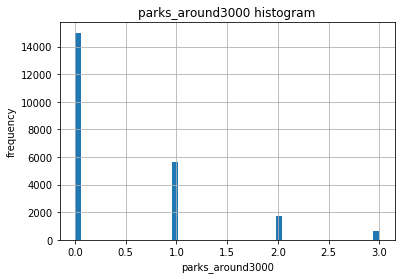

In [33]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
column_info(df, 'parks_around3000')


Descriptive Stats: 
 count    7970.000000
mean      490.732497
std       341.597081
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
Name: parks_nearest, dtype: float64

Number of missing value in the dataSet: 15000


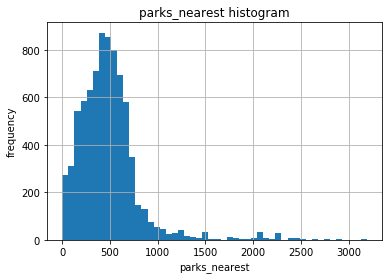

In [34]:
########################### Dealing with parks_nearest ####################################################
column_info(df, 'parks_nearest')


Descriptive Stats: 
 count    22895.000000
mean       483.275545
std        230.504394
min          1.000000
25%        371.414266
50%        498.501320
75%        501.100000
max       3190.000000
Name: parks_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    482.000000
1    371.414266
2     90.000000
3     84.000000
4    112.000000
Name: parks_nearest, dtype: float64

Number of missing value in the dataSet: 0
   index  parks_nearest  parks_nearest_modfied  % Difference
0  count    8079.000000           22895.000000    183.389033
1   mean     490.804555             483.275545      1.534014
2    std     342.317995             230.504394     32.663664
3    min       1.000000               1.000000      0.000000
4    25%     288.000000             371.414266     28.963287
5    50%     455.000000             498.501320      9.560730
6    75%     612.000000             501.100000     18.120915
7    max    3190.000000            3190.000000      0.000000


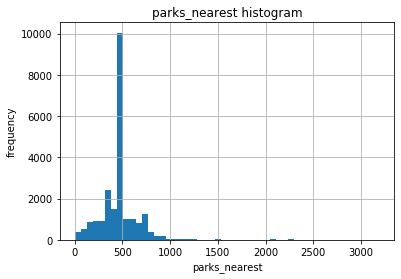

In [35]:
column_name = 'parks_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
column_info(df, column_name)
stats_delta(column_name)

No missing values and the stats are well preserved except for the std (33% difference). Note, we have created a large spike in the dataset at around value of 500. This can be explained by the fact that on the major localities (the one which is very frequent in the dataset) had no infomation about its nearest parks. It makes sense if that locality would be St.Peterburg as it is the most frequent locality. We can check that by calculating the number of empty values in the parks_nearest column for st.Peterburg locality.

In [36]:
print(df_copy.query('locality_name == "Санкт-Петербург"').parks_nearest.isnull().sum())
print(df_copy.query('locality_name == "Санкт-Петербург"').parks_nearest_mean.head())

8437
0    498.50132
2    498.50132
3    498.50132
4    498.50132
7    498.50132
Name: parks_nearest_mean, dtype: float64


As we can see the value of 8437 makes sense. What this means is that 8437 empty values all corresponding to St Petersburg were filled in the by calcaulted mean distance (as per function distance_column) to the nearest park with the value of 498 = where the peak occurs. This peak also explain the difference between the original std and the modified column - peak of that height "pulls" in the data set towards itself reducing the std.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Good :)

You could have checked if there are any observations with missing values in `parks_around3000` and value of `parks_nearest` less than 3000 befor filling nans in `parks_around3000` with 0 :)

------------


Descriptive Stats: 
 count    17974.000000
mean         0.766329
std          0.936075
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

First 5 rows of the dataSet: 
 0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around3000, dtype: float64

Number of missing value in the dataSet: 4921


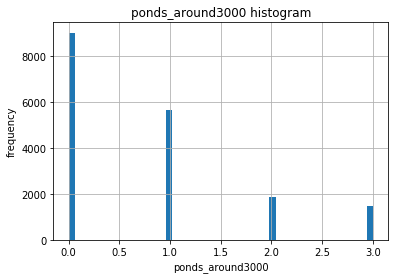

In [37]:
########################### Dealing with ponds_around3000 ####################################################
column_info(df, 'ponds_around3000')

Here, I will treat the missing data as no pounds in 3km radius i.e. missing data = 0. Same strategy as for the balconies and parks (=consistency)


Descriptive Stats: 
 count    22895.000000
mean         0.601616
std          0.887124
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

First 5 rows of the dataSet: 
 0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around3000, dtype: float64

Number of missing value in the dataSet: 0


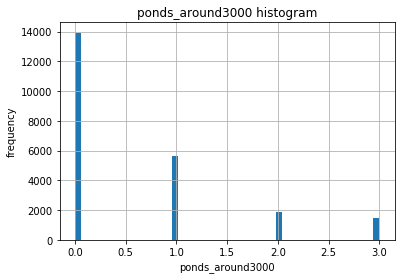

In [38]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
column_info(df, 'ponds_around3000')


Descriptive Stats: 
 count    8976.000000
mean      519.268048
std       278.163887
min        13.000000
25%       294.000000
50%       503.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
Name: ponds_nearest, dtype: float64

Number of missing value in the dataSet: 13919


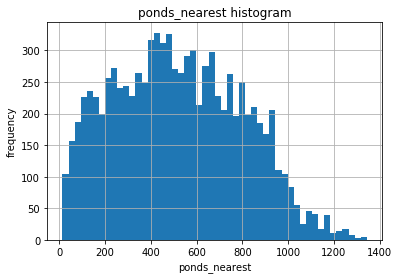

In [39]:
########################### Dealing with ponds_nearest ####################################################
column_info(df, 'ponds_nearest')


Descriptive Stats: 
 count    22870.000000
mean       519.602838
std        195.397369
min         13.000000
25%        443.690545
50%        521.464340
75%        573.217105
max       1344.000000
Name: ponds_nearest, dtype: float64

First 5 rows of the dataSet: 
 0    755.000000
1    573.217105
2    574.000000
3    234.000000
4     48.000000
Name: ponds_nearest, dtype: float64

Number of missing value in the dataSet: 0
   index  ponds_nearest  ponds_nearest_modfied  % Difference
0  count    9110.000000           22870.000000    151.042810
1   mean     517.980900             519.602838      0.313127
2    std     277.720643             195.397369     29.642475
3    min      13.000000              13.000000      0.000000
4    25%     294.000000             443.690545     50.915151
5    50%     502.000000             521.464340      3.877359
6    75%     729.000000             573.217105     21.369396
7    max    1344.000000            1344.000000      0.000000


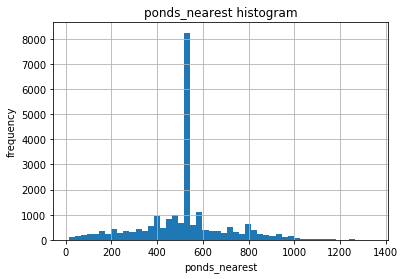

In [40]:
column_name = 'ponds_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
column_info(df, column_name)
stats_delta(column_name)

No missing values and the stats are well preserved except for the std (31% difference). Note, we have created a large spike in the dataset at around value of 520. This can be explained by the fact that on the major localities (the one which is very frequent in the dataset) had no infomation about its nearest ponds. It makes sense if that locality would be St.Peterburg as it is the most frequent locality. We can check that by calculating the number of empty values in the ponds_nearest column for st.Peterburg locality. Note, 25% and 75% Q medians are chnaged quite a lot - 46% and 20%. However, the mean and second quartile: between 25.1% and 50% (up to the median) is also well preserved.

In [41]:
print(df_copy.query('locality_name == "Санкт-Петербург"').ponds_nearest.isnull().sum())
print(df_copy.query('locality_name == "Санкт-Петербург"').ponds_nearest_mean.head())

7738
0    521.46434
2    521.46434
3    521.46434
4    521.46434
7    521.46434
Name: ponds_nearest_mean, dtype: float64


As we can see the value of 7738 makes sense. What this means is that 7738 empty values all corresponding to St Petersburg were filled in the by calcaulted mean distance (as per function distance_column) to the nearest pond with the value of 521 = where the peak occurs. This peak also explains the difference between the original std and the modified column - peak of that height "pulls" in the data set towards itself reducing the std.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Can you explain why you chose these approaches to fill missing values in columns "parks_aroun3000", "parks_nearest", ponds_around300", "ponds_nearest"?

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------


Descriptive Stats: 
 count    19804.000000
mean       179.956322
std        219.377818
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

First 5 rows of the dataSet: 
 0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

Number of missing value in the dataSet: 3066


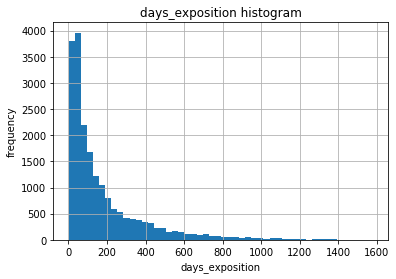

In [42]:
########################### Dealing with days_exposition ####################################################
column_info(df, 'days_exposition')

3130 missing cells. Here I will fill them in the following way:
    1) Create a column days_exposition_median which calculates and assigns the mean of days_exposition based on locality.
    2) Then, empty values are replaced by the calculated mean for each locality - so that for every missing value x for y locality --> x would be replaced by z on every instance.
 
So employing this method, I am making an assumption that the main factor that determines the days_expostion (=which is also the number of days it takes to sell the apartment?) is the locality.

In [43]:
df['days_exposition_mean'] = df.groupby('locality_name')['days_exposition'].transform(lambda x: x.mean())
df['days_exposition'] = df.apply(lambda x: x['days_exposition_mean'] if pd.isnull(x['days_exposition']) 
                                      else x['days_exposition'], 
                                      axis=1)


Ok, the method worked well as we filled all missing values with the exception of 79 --> let us drop them and then do stats analysis.


Descriptive Stats: 
 count    22791.000000
mean       180.094758
std        204.951722
min          1.000000
25%         45.000000
50%        119.000000
75%        208.000000
max       1580.000000
Name: days_exposition, dtype: float64

First 5 rows of the dataSet: 
 0    182.445818
1     81.000000
2    558.000000
3    424.000000
4    121.000000
Name: days_exposition, dtype: float64

Number of missing value in the dataSet: 0
   index  days_exposition  days_exposition_modfied  % Difference
0  count     20518.000000             22791.000000     11.078078
1   mean       180.888634               180.094758      0.438876
2    std       219.727988               204.951722      6.724799
3    min         1.000000                 1.000000      0.000000
4    25%        45.000000                45.000000      0.000000
5    50%        95.000000               119.000000     25.263158
6    75%       232.000000               208.000000     10.344828
7    max      1580.000000              1580.000000 

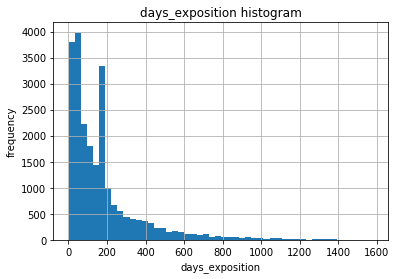

In [44]:
df.dropna(subset=['days_exposition'], inplace=True) # only 49 missing values here --> drop no problem

column_info(df, 'days_exposition')
stats_delta('days_exposition')

Ok, no missing values and the stats are well preserved.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Good :)

Is it also possible that nans in this feature arose just because ads was still exposed? Have you checked values in `last_price`? Are there any zero values? 

------------

In [45]:
################################### Overall Code for quick run - no prints ################################################
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
from matplotlib import pyplot as plt
df_copy = df.copy()

# this function gives a good summary of a numerical column
def column_info(dataFrame, column_name):
    plt.hist(dataFrame[column_name], bins = 50)
    plt.grid()
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.title('%s histogram' %column_name)
    
    print('\nDescriptive Stats: \n', dataFrame[column_name].describe())
    print('\nFirst 5 rows of the dataSet: \n', dataFrame[column_name].head())
    print('\nNumber of missing value in the dataSet:', dataFrame[column_name].isnull().sum())

# before proceeding with the analysis, I created a function that calculates stats of a given column - will definitely be needed
def column_stats(data_sclice, column_name, stat):
    if stat == 'mean':
        x = data_sclice[column_name].mean()
    if stat == 'median':
        x = data_sclice[column_name].median()
    if stat == 'std':
        x = data_sclice[column_name].std()
    return x

def column_info_bool(dataFrame, column_name):
    pd.DataFrame(dataFrame[column_name].astype(float).value_counts()).plot(kind = 'bar', 
                                                                   title = '%s Histogram' % column_name)
    print('\nUnique Values: \n', dataFrame[column_name].value_counts())
    print('\nFirst 5 rows of the dataSet: \n', dataFrame[column_name].head())
    print('\nNumber of missing value in the dataSet:', dataFrame[column_name].isnull().sum())

df['ceiling_height'] = df['ceiling_height'].fillna(column_stats(df, 'ceiling_height', 'mean'))
df = df[(df['ceiling_height'] <= 4.5) & (df['ceiling_height'] >=2)]
df = df[(df['floors_total'] <= 36)]
df = df[(df['total_area'] <= 350)]
df['living_to_total'] = df['living_area'] / df['total_area']
df['living_to_total'] = df['living_to_total'].fillna(column_stats(df, 'living_to_total', 'mean'))
mean_df = df['living_to_total'].mean()
df['living_area'] = df.apply(lambda x: x['total_area']*mean_df if pd.isnull(x['living_area']) else x['living_area'], axis=1)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
mean_df = df['kitchen_to_total'].mean()
df['kitchen_area'] = df.apply(lambda x: x['total_area']*mean_df if pd.isnull(x['kitchen_area']) else x['kitchen_area'], axis=1)
df = df[(df['kitchen_area'] <= 60)]
df['balcony'] = df['balcony'].fillna(0)
df.dropna(subset=['locality_name'], inplace=True) # only 49 missing values here --> drop no problem
import numpy as np
def distance_column(column_to_be_filled):
    df['%s_mean' % (column_to_be_filled)] = df.groupby('locality_name')[column_to_be_filled].transform(lambda x: x.mean())
    df[column_to_be_filled] = df.apply(lambda x: x['%s_mean' % (column_to_be_filled)] if pd.isnull(x[column_to_be_filled]) 
                                      else x[column_to_be_filled], 
                                      axis=1)

    mu, sigma = column_stats(df, column_to_be_filled, 'mean'), column_stats(df, column_to_be_filled, 'std')
    df[column_to_be_filled] = df.groupby(['locality_name'])[column_to_be_filled].transform(
        lambda x: x.fillna(np.random.normal(mu, sigma)))
    df_copy['%s_mean' % (column_to_be_filled)] = df['%s_mean' % (column_to_be_filled)]
    return df


column_name = 'airports_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
column_name = 'cityCenters_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
df['parks_around3000'] = df['parks_around3000'].fillna(0)

column_name = 'parks_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
column_name = 'ponds_nearest'
distance_column(column_name)
df = df[(df[column_name] >= df_copy[column_name].min())] # Some random values will be genereated below the min of the original dataset 
df = df[(df[column_name] <= df_copy[column_name].max())] # Some random values will be genereated above the max of the original dataset 
df['days_exposition_mean'] = df.groupby('locality_name')['days_exposition'].transform(lambda x: x.mean())
df['days_exposition'] = df.apply(lambda x: x['days_exposition_mean'] if pd.isnull(x['days_exposition']) 
                                      else x['days_exposition'], 
                                      axis=1)
df.dropna(subset=['days_exposition'], inplace=True) # only 49 missing values here --> drop no problem



cols = ['last_price', 'floors_total', 'balcony',
        'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
        'ponds_nearest', 'days_exposition', 'parks_nearest', 'ponds_around3000']
df[cols] = df[cols].astype('int')

# Remove all columns added as part of the analysis - restore how it was.
df.drop(df.iloc[:, 22::], inplace = True, axis = 1) 

print(df.info())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22863 entries, 0 to 23698
Data columns (total 22 columns):
total_images            22863 non-null int64
last_price              22863 non-null int64
total_area              22863 non-null float64
first_day_exposition    22863 non-null object
rooms                   22863 non-null int64
ceiling_height          22863 non-null float64
floors_total            22863 non-null int64
living_area             22863 non-null float64
floor                   22863 non-null int64
is_apartment            22863 non-null bool
studio                  22863 non-null bool
open_plan               22863 non-null bool
kitchen_area            22863 non-null float64
balcony                 22863 non-null int64
locality_name           22863 non-null object
airports_nearest        22863 non-null int64
cityCenters_nearest     22863 non-null int64
parks_around3000        22863 non-null int64
parks_nearest           22863 non-null int64
ponds_around3000        22863

Ok, 22 original columns with 22488 (note this number will vary for every run as I am using random numbers to fill some data) rows and no missing data! I chnaged the data types in the following columns ['last_price', 'floors_total', 'balcony','airports_nearest', 'cityCenters_nearest', 'parks_around3000','ponds_nearest', 'days_exposition', 'parks_nearest', 'ponds_around3000'] to aid further analysis - no need for distance in m and number of ponds to be floats etc. I kept the area columns and ceiling as float as those need to be known to a high a degree of accuaracy - I would prefer to know that the kitchen is 5.6 m rather than 5 or 6 m.

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Great, no missing values :)

To finish with this step:
* please, provide clear explanations on why you choose particular methods to fill missing values. Answer my questions and make sure that your approaches do not skew the data. It will be great if you indicate pros and cons for each method;
* name graphs and axis;
* check if there are any problems with data types for each column;
* to fill missing values in "living_area" and "kitchen_area" it may be interesting to study living_area to total_area ration and kitchen area to total area ratio.

*P.S. While deciding on the approach to fill missing values you should not only consider each column separately from the dataset. Examine all the features in the dataset relative to each other. From the relationship of features you can also get an idea on why there are missing values and how they can be filled or regained.*

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Great :)

Thank you for responding to my comments and explaining everything  💪

There are several important points worth mentioning:
* before deleting outliers or defining them you should state an approach that will be used to identify outliers (based on interquartile range or anything else);
* it is important to study pros and cons of methods you choose to fill data. Most of the time there are several ways to fill one type missing data and all of them can be used. The main point here is to understand how data is affected with these approaches and thus your analysis, conclusions and results.
* treat dataset as a whole. All the features and observations are connected to each other in some way. You should understand and take into consideration these connections;
* even if there are no missing values in the column, you still should study distribution or range of its values.

------------

### Step 3. Make calculations and add them to the table


Descriptive Stats: 
 count    2.286300e+04
mean     9.978315e+04
std      4.707213e+04
min      1.118349e+02
25%      7.752171e+04
50%      9.530201e+04
75%      1.146293e+05
max      1.736842e+06
Name: price_per_m2, dtype: float64

First 5 rows of the dataSet: 
 0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_per_m2, dtype: float64

Number of missing value in the dataSet: 0


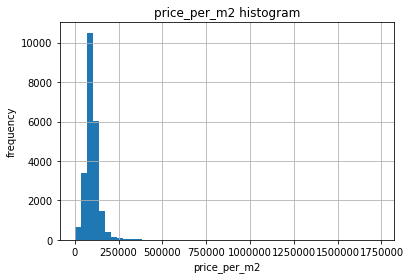

In [46]:
###################### the price per square meter
df['price_per_m2'] = df['last_price'] / df['total_area']
df_copy['price_per_m2'] = df['price_per_m2']

column_info(df, 'price_per_m2')

Let us remove the outliers - we can see that we can slice the data by a value of 300000. Before we will see how many rows will be dropped due to this slicing.

Number of rows dropped due to filtering: 149

Descriptive Stats: 
 count     22714.000000
mean      97574.057750
std       35261.832063
min         111.834862
25%       77383.983125
50%       95161.290323
75%      114109.264719
max      300000.000000
Name: price_per_m2, dtype: float64

First 5 rows of the dataSet: 
 0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_per_m2, dtype: float64

Number of missing value in the dataSet: 0


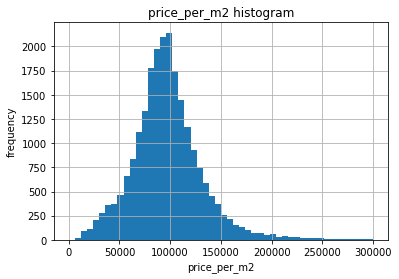

In [47]:
column_name = 'price_per_m2'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 300000)][column_name].count())

df = df[(df['price_per_m2'] <= 300000)]
column_info(df, 'price_per_m2')

Ok so we only dropped 149 (<1% of all data) values but are now in much better position to understand the nature of this dataSet.


Descriptive Stats: 
 count                   22714
unique                   1488
top       2018-02-01 00:00:00
freq                      358
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: time_new, dtype: object

First 5 rows of the dataSet: 
 0   2019-03-07
1   2018-12-04
2   2015-08-20
4   2018-06-19
5   2018-09-10
Name: time_new, dtype: datetime64[ns]

Number of missing value in the dataSet: 0


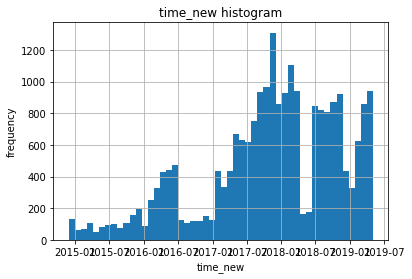

In [48]:
###################### the day of the week, month, and year that the ad was published
df['time_new'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
column_info(df, 'time_new')

All seems ok.


Descriptive Stats: 
 count    22714.000000
mean         2.563837
std          1.787800
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

First 5 rows of the dataSet: 
 0    3
1    1
2    3
4    1
5    0
Name: weekday, dtype: int64

Number of missing value in the dataSet: 0


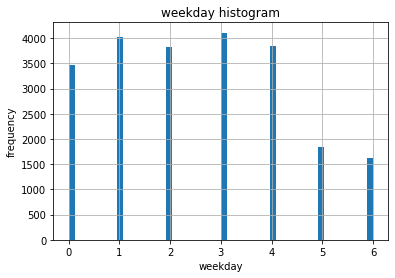

In [49]:
###################### the day of the week, month, and year that the ad was published
df['weekday'] = df['time_new'].dt.weekday
column_info(df, 'weekday')


Descriptive Stats: 
 count    22714.000000
mean      2017.362023
std          1.035029
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

First 5 rows of the dataSet: 
 0    2019
1    2018
2    2015
4    2018
5    2018
Name: year, dtype: int64

Number of missing value in the dataSet: 0


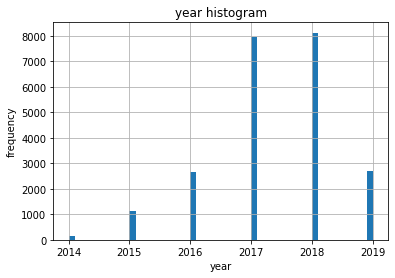

In [50]:
###################### the day of the week, month, and year that the ad was published
df['year'] = pd.DatetimeIndex(df['time_new']).year
column_info(df, 'year')

All seems OK - more ads posted every year since 2014 to 2018. Drop in 2019? But let us check is the 2019 is incomplete?

In [51]:
print(df.query('year == 2019').time_new.max())

2019-05-03 00:00:00


Ok, we can see that the dataset consists of only 5 months in 2019 - so we need to be careful when comparing it to full years. Let us see the last month in other years.

In [52]:
for i in [2014,2015,2016,2017,2018]:
    print('last month in %d' %i, df.query('year == @i').time_new.max())

last month in 2014 2014-12-29 00:00:00
last month in 2015 2015-12-31 00:00:00
last month in 2016 2016-12-30 00:00:00
last month in 2017 2017-12-31 00:00:00
last month in 2018 2018-12-31 00:00:00


Ok - so we can see that all other years are "full" years (12 months) in terms of ads posting. So, I think it is fair to exclude 2019 when comparing the data to other "full years" - let us keep that in mind.


Descriptive Stats: 
 count    22714.000000
mean         6.398917
std          3.494928
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

First 5 rows of the dataSet: 
 0     3
1    12
2     8
4     6
5     9
Name: month, dtype: int64

Number of missing value in the dataSet: 0


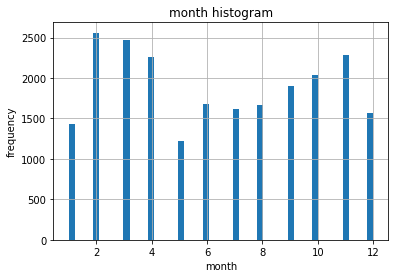

In [53]:
df['month'] = pd.DatetimeIndex(df['time_new']).month
column_info(df, 'month')

0
3


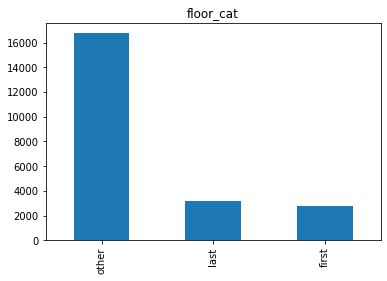

In [54]:
###################### which floor the apartment is on (first, last, or other)
df['floor_cat'] = df.apply(lambda row: ('first'
                                               if row['floor'] == 1
                                               else row['floors_total'] / row['floor']),
                                   axis=1)
def floor_category(row):
    if row == 'first':
        return 'first'
    elif row == 1:
        return 'last'
    else:
        return 'other'

df['floor_cat'] = df['floor_cat'].apply(floor_category)
    
print(df['floor_cat'].isnull().sum())
print(df['floor_cat'].nunique())
df['floor_cat'].value_counts().plot(kind = 'bar', title = 'floor_cat')

Ok - no empty values, 3 unique entries as expected.


Descriptive Stats: 
 count    22714.000000
mean         0.565028
std          0.100674
min          0.038462
25%          0.500000
50%          0.564900
75%          0.631829
max          1.000000
Name: living_to_total_area, dtype: float64

First 5 rows of the dataSet: 
 0    0.472222
1    0.460396
2    0.612500
4    0.320000
5    0.473684
Name: living_to_total_area, dtype: float64

Number of missing value in the dataSet: 0


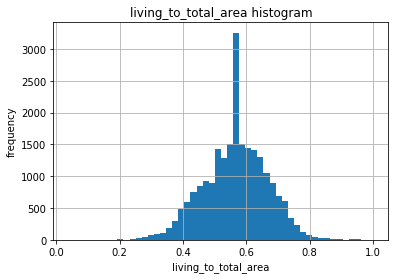

In [55]:
###################### the ratio between the living space and the total area
df['living_to_total_area'] = df['living_area'] / df['total_area']
column_info(df, 'living_to_total_area')


Descriptive Stats: 
 count    22714.000000
mean         0.187233
std          0.068882
min          0.025381
25%          0.136957
50%          0.181818
75%          0.223986
max          0.787879
Name: kitchen_to_total_area, dtype: float64

First 5 rows of the dataSet: 
 0    0.231481
1    0.272277
2    0.148214
4    0.410000
5    0.299342
Name: kitchen_to_total_area, dtype: float64

Number of missing value in the dataSet: 0


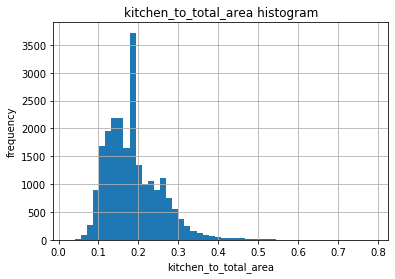

In [56]:
###################### the ratio the kitchen space and the total area
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']
column_info(df, 'kitchen_to_total_area')

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Great :)

To finish with this step you should also check whether everything is calculated correctly :)

Second `if` in the function `floor_categiry`  should be replaced with `elif`.

------------

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------

### Step 4. Conduct exploratory data analysis and follow the instructions below:


Descriptive Stats: 
 count    22714.000000
mean        59.204789
std         30.134575
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        347.500000
Name: total_area, dtype: float64

First 5 rows of the dataSet: 
 0    108.0
1     40.4
2     56.0
4    100.0
5     30.4
Name: total_area, dtype: float64

Number of missing value in the dataSet: 0


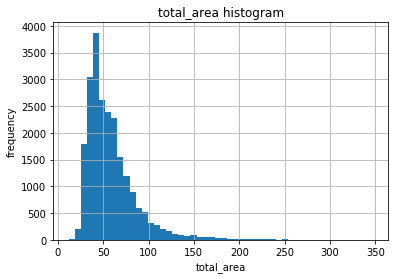

In [57]:
# Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. 
# Plot a histogram for each parameter.

column_info(df, 'total_area')

We had already dealt (slice by 350) with the total area when using it in the analysis to calculate thee missing values for kitchen and living area. However, we can refine it further as we still do have a very long tail. We can further cut the outliers by a value of 300.

Number of rows dropped due to filtering: 998

Descriptive Stats: 
 count    22701.000000
mean        59.054067
std         29.475586
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        300.000000
Name: total_area, dtype: float64

First 5 rows of the dataSet: 
 0    108.0
1     40.4
2     56.0
4    100.0
5     30.4
Name: total_area, dtype: float64

Number of missing value in the dataSet: 0


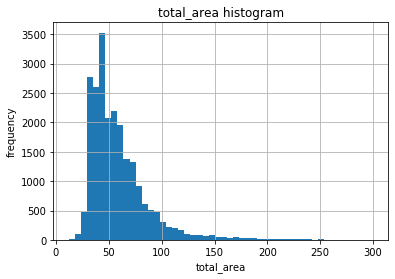

In [58]:
column_name = 'total_area'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 300)][column_name].count())

df = df[(df[column_name] <= 300)]
column_info(df, column_name)

This slicing does drop a lot of data points (810) but that tail is very long skewing the average value. 


Descriptive Stats: 
 count    2.270100e+04
mean     5.975167e+06
std      4.815503e+06
min      1.219000e+04
25%      3.480000e+06
50%      4.650000e+06
75%      6.750000e+06
max      8.300000e+07
Name: last_price, dtype: float64

First 5 rows of the dataSet: 
 0    13000000
1     3350000
2     5196000
4    10000000
5     2890000
Name: last_price, dtype: int64

Number of missing value in the dataSet: 0


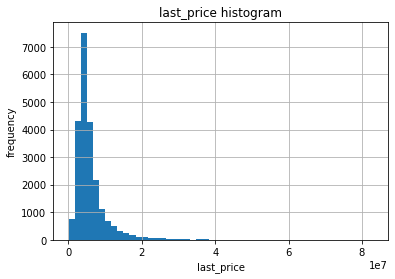

In [59]:
column_info(df, 'last_price')

Ok, clear outliers here - lets slice this dataSet by a value of 4*1e7 rubles.

Number of rows dropped due to filtering: 1038

Descriptive Stats: 
 count    2.266100e+04
mean     5.893343e+06
std      4.387069e+06
min      1.219000e+04
25%      3.480000e+06
50%      4.650000e+06
75%      6.700000e+06
max      4.000000e+07
Name: last_price, dtype: float64

First 5 rows of the dataSet: 
 0    13000000
1     3350000
2     5196000
4    10000000
5     2890000
Name: last_price, dtype: int64

Number of missing value in the dataSet: 0


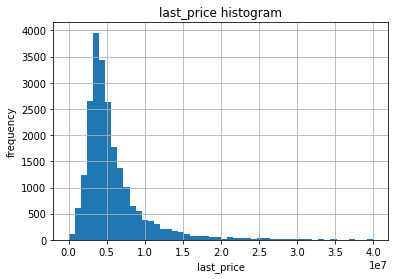

In [60]:
column_name = 'last_price'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 4*1e7)][column_name].count())

df = df[(df[column_name] <= 4*1e7)]
column_info(df, column_name)

Ok, much better - dropped 850 data points but are now able to much better visualize the distribution of this data.


Descriptive Stats: 
 count    22661.000000
mean         2.051233
std          1.036865
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

First 5 rows of the dataSet: 
 0    3
1    1
2    2
4    2
5    1
Name: rooms, dtype: int64

Number of missing value in the dataSet: 0


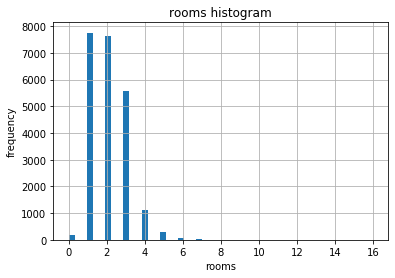

In [61]:
column_info(df, 'rooms')

Ok, clear outliers here - lets slice this dataSet by a value of 7 rooms.

Number of rows dropped due to filtering: 1056

Descriptive Stats: 
 count    22643.000000
mean         2.045180
std          1.012962
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

First 5 rows of the dataSet: 
 0    3
1    1
2    2
4    2
5    1
Name: rooms, dtype: int64

Number of missing value in the dataSet: 0


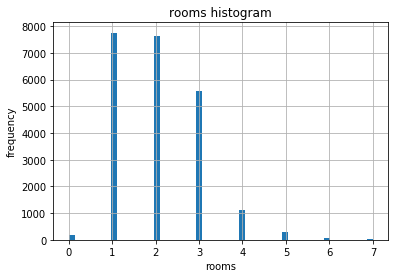

In [62]:
column_name = 'rooms'
print('Number of rows dropped due to filtering:', 
      df_copy[column_name].count() - df[(df[column_name] <= 7)][column_name].count())

df = df[(df[column_name] <= 7)]
column_info(df, column_name)

Ok, much better - dropped 868 data points but are now able to much better visualize the distribution of this data.


Descriptive Stats: 
 count    22643.000000
mean         2.739023
std          0.206072
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.500000
Name: ceiling_height, dtype: float64

First 5 rows of the dataSet: 
 0    2.700000
1    2.771499
2    2.771499
4    3.030000
5    2.771499
Name: ceiling_height, dtype: float64

Number of missing value in the dataSet: 0


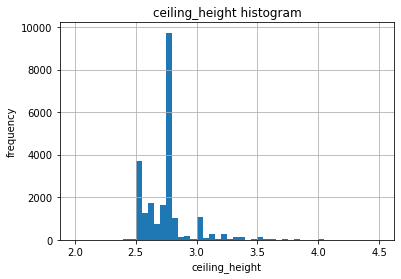

In [63]:
column_info(df, 'ceiling_height')

We had already dealth with this column as it contained missing values.

average days needed for sale 180
median days needed for sale 120


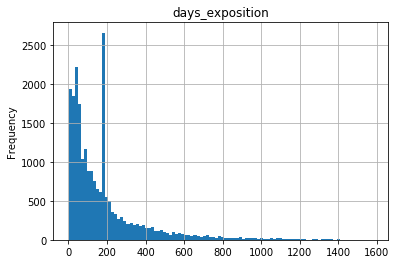

In [64]:
# Examine the time it's taken to sell the apartment and plot a histogram.
# Calculate the mean and median and explain the average time it usually takes to complete a sale. 
# When can a sale be considered to have happened rather quickly or taken an extra long time?

df['days_exposition'].plot(kind = 'hist', bins = 100, title = 'days_exposition', grid = True)

print('average days needed for sale', int(df.days_exposition.mean()))
print('median days needed for sale', int(df.days_exposition.median()))

the frequency of sales decreases exponentially with advertisment days -- exponential decay
The sale can be considered a quick one if it sells in under 119 days (median) because the average value is skewed 
by some properties being on sale for more than 3 or 4 years! Extra long is over 179 days (mean) and that is because once you 
exceed that value you can enter the realm where apartemnts can take years to sell. 
So between median and mean value is standard selling time.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

<div class="alert alert-block alert-danger">
<h2> Comments </h2>
</div>

Are there any other columns with outliers?

------------

To answer the above question lets select all numeric columns and plot their histograms - without any prints so that we dont get lost.

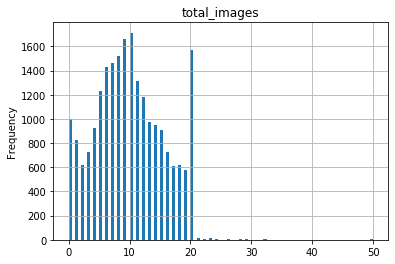

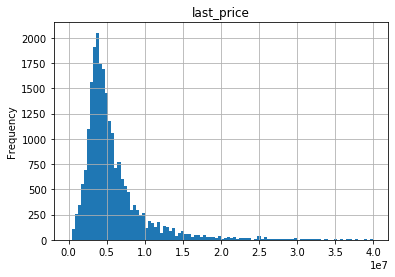

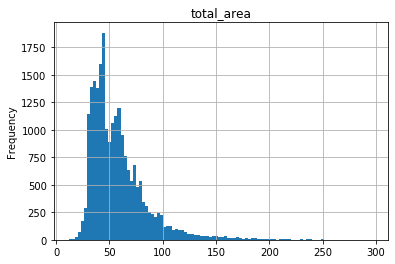

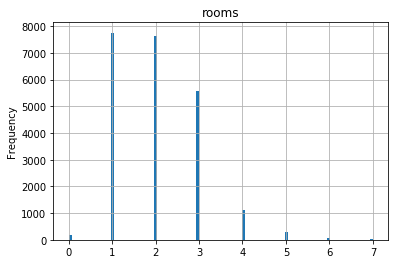

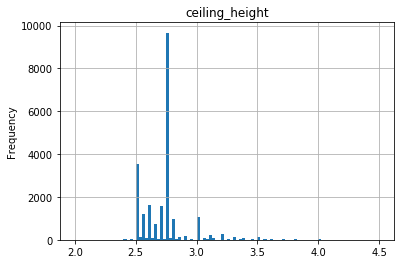

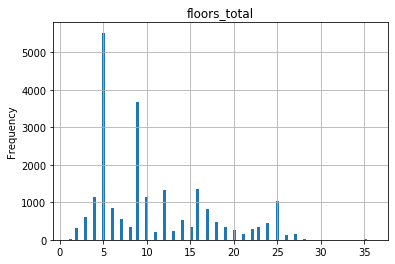

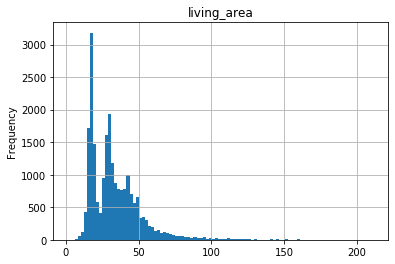

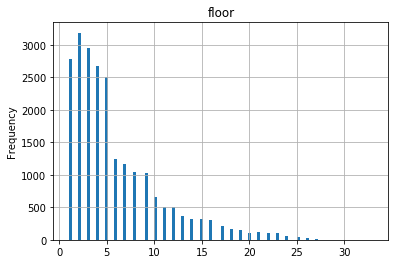

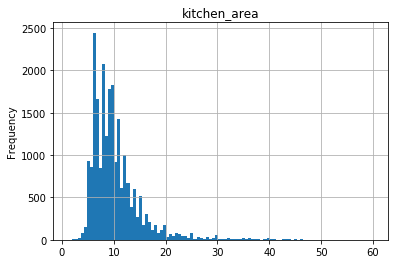

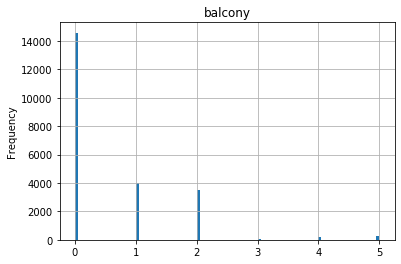

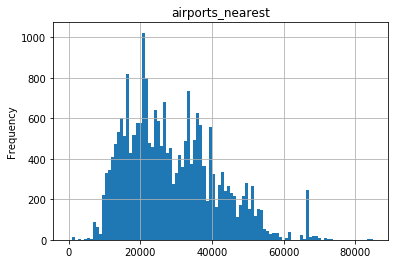

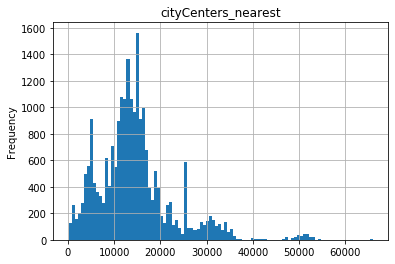

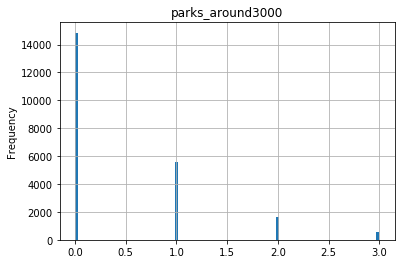

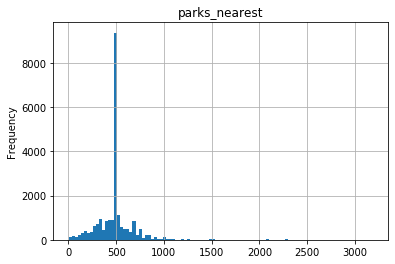

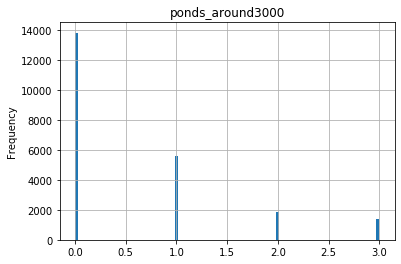

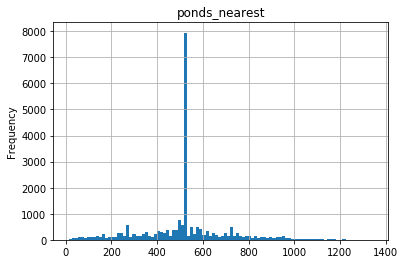

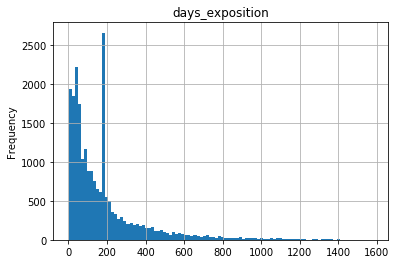

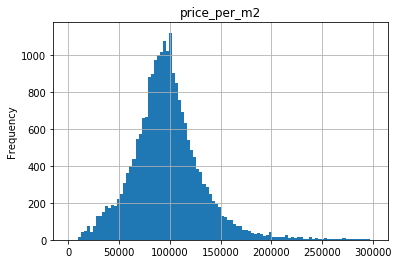

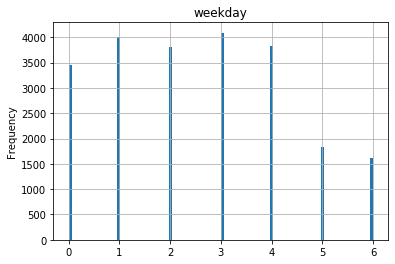

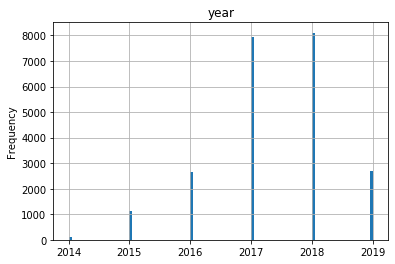

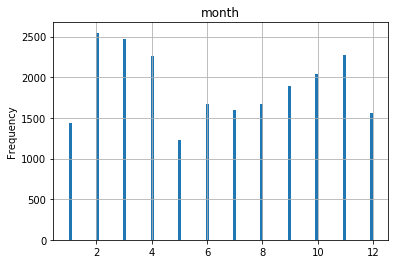

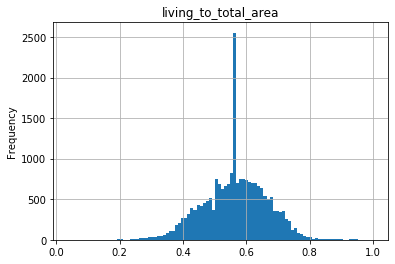

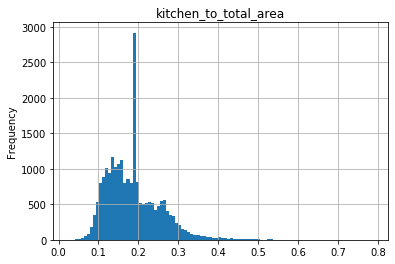

In [65]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

for col in newdf.columns:
    df[col].plot(kind = 'hist', bins = 100, title = col, grid = True)
    plt.show()

Ok this was a good idea so let us start removing the outliers - they are well visible on the histograms:
    1) total images <= 22 
    2) living_area <=150
    3) kitchen area <= 50
    4) parks nearest <= 1100
    5) kitchen_to_total <= 0.6

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

To identify outliers it is better to use boxplot :)

------------

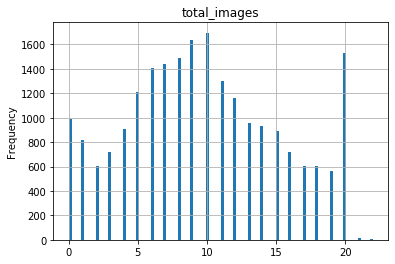

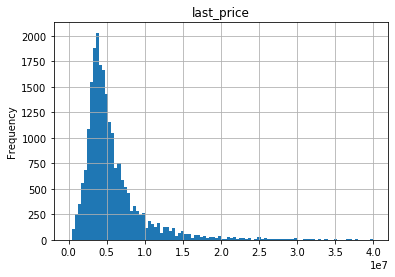

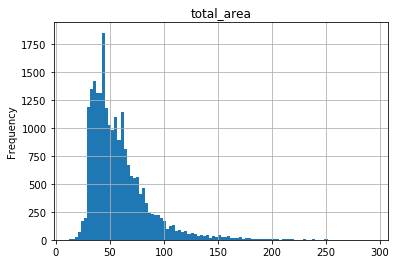

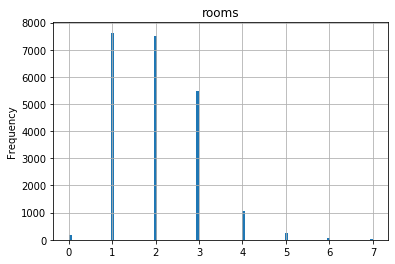

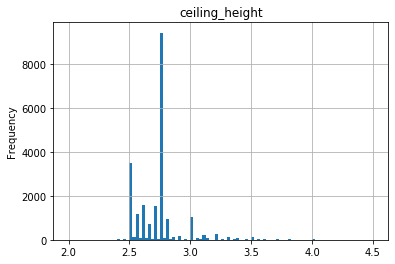

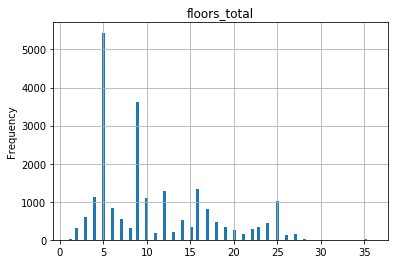

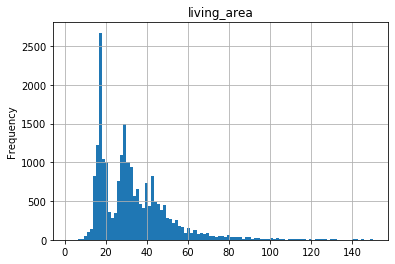

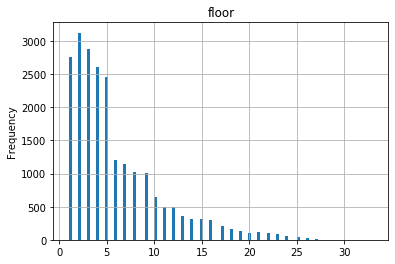

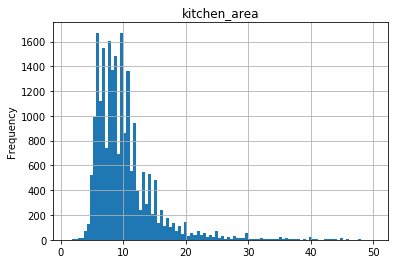

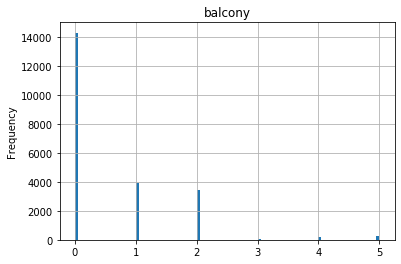

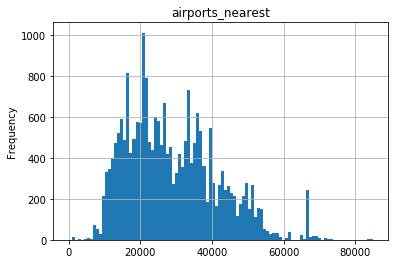

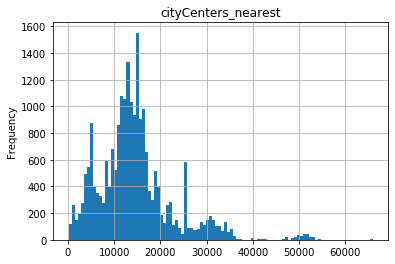

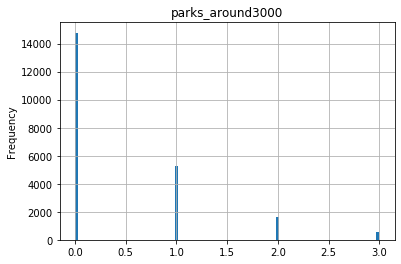

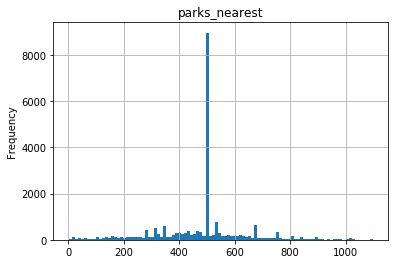

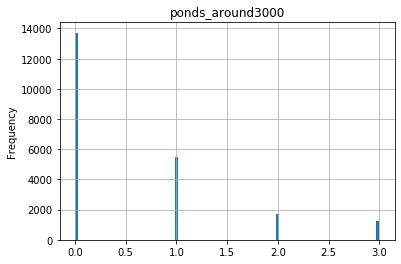

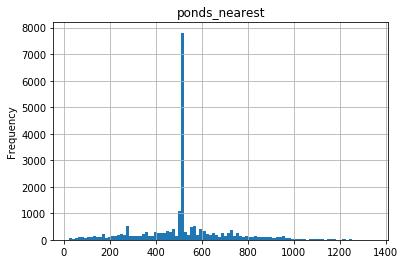

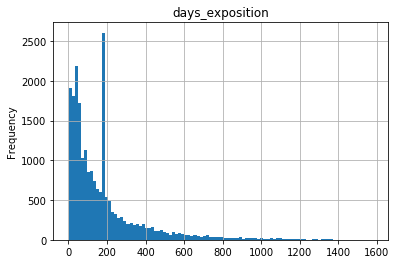

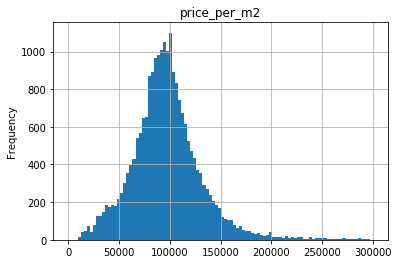

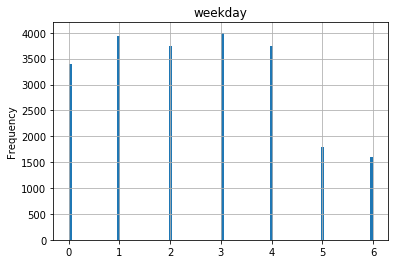

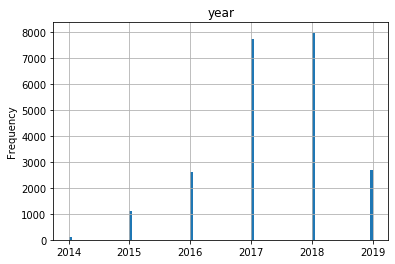

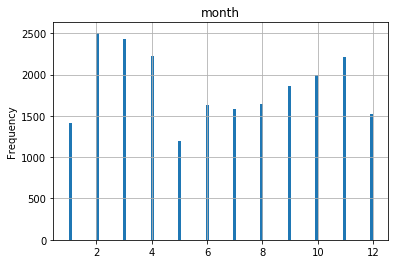

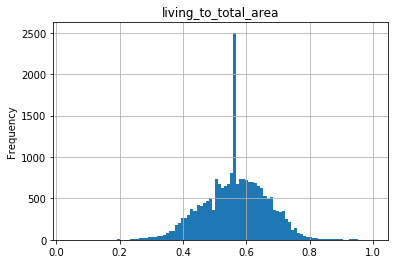

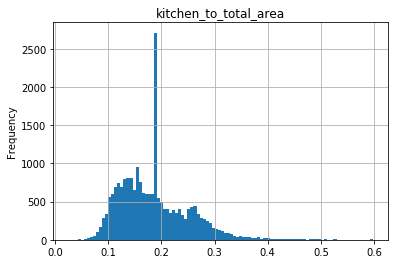

In [66]:
# Removing outlying patterns
df = df[(df['total_images'] <= 22)]
df = df[(df['living_area'] <= 150)]
df = df[(df['kitchen_area'] <= 50)]
df = df[(df['parks_nearest'] <= 1100)]
df = df[(df['kitchen_to_total_area'] <= 0.6)]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

for col in newdf.columns:
    df[col].plot(kind = 'hist', bins = 100, title = col, grid = True)
    plt.show()


Ok - final dataFrame check:

In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22209 entries, 0 to 23698
Data columns (total 30 columns):
total_images             22209 non-null int64
last_price               22209 non-null int64
total_area               22209 non-null float64
first_day_exposition     22209 non-null object
rooms                    22209 non-null int64
ceiling_height           22209 non-null float64
floors_total             22209 non-null int64
living_area              22209 non-null float64
floor                    22209 non-null int64
is_apartment             22209 non-null bool
studio                   22209 non-null bool
open_plan                22209 non-null bool
kitchen_area             22209 non-null float64
balcony                  22209 non-null int64
locality_name            22209 non-null object
airports_nearest         22209 non-null int64
cityCenters_nearest      22209 non-null int64
parks_around3000         22209 non-null int64
parks_nearest            22209 non-null int64
ponds_arou

Top 6 factors that have had the biggest influence on an apartment’s price
         parameter  Pearson_coeff
2       total_area       0.801920
6      living_area       0.702383
20    price_per_m2       0.671470
11    kitchen_area       0.629951
3            rooms       0.514585
4   ceiling_height       0.396711


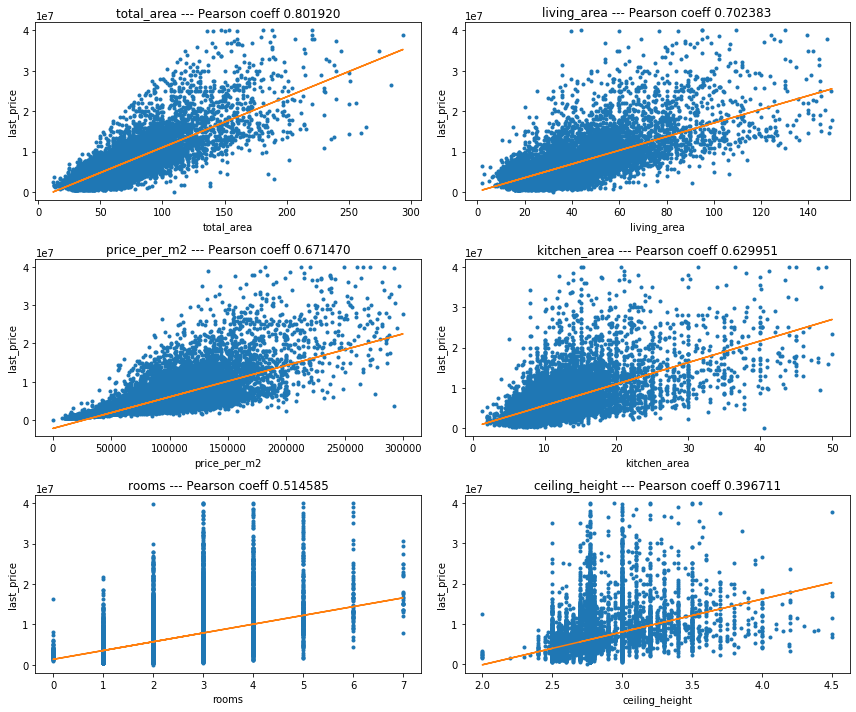

In [68]:
# Which factors have had the biggest influence on an apartment’s price? 
from numpy.polynomial.polynomial import polyfit


# here I am creating list of person coeffs wrt to last_price for numerical columns, hence except TypeError
Pearson_coeff = []
column_names = []
for col in df.columns:
    try:
        Pearson_coeff.append(df[col].corr(df['last_price']))
        column_names.append(col)
    except TypeError:
        continue

        
# putting the above results into dataframe and getting rid of the last_price as no point correlating on itself
df_corr = pd.DataFrame({'parameter':column_names})
df_corr['Pearson_coeff'] = Pearson_coeff
df_corr['Pearson_coeff'] = df_corr['Pearson_coeff'].abs()
df_corr = df_corr.query('parameter != "last_price"').sort_values(by = 'Pearson_coeff', ascending = False)
print('Top 6 factors that have had the biggest influence on an apartment’s price')
print(df_corr.head(6))


# plotting last_price vs the identified top 6 columns that have had the biggest influence on an apartment’s price
fig = plt.figure(figsize=(12, 10))

analysis = df_corr.parameter.head(6).to_list()
for i, num in zip(analysis, range(1,len(analysis)+1)):
    
    ax = fig.add_subplot(3,2,num)
    ax.scatter(df[i], df['last_price'], s=1)
    
    b, m = polyfit(df[i], df['last_price'], 1)
    ax.plot(df[i], df['last_price'], '.')
    ax.plot(df[i], b + m * df[i], '-')
    ax.set_title('%s --- Pearson coeff %f' % (i, df[i].corr(df['last_price'])))
    ax.set_xlabel(i)
    ax.set_ylabel('last_price')
    

plt.tight_layout()
plt.show()


# we see that columns with repeating data such as ceiling height and rooms need to be replotted by using pivot tables
# the orange line is a basic line of best fit to demostrate the gradient of the data points

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

You should write conclusions that you made from these graphs here.

------------

So, The top 6 parameters that have the biggest influence on St.Petersburg real estate price are (in order):

parameter  Pearson_coeff
total_area       0.802687
living_area       0.703059
price_per_m2       0.669394
kitchen_area       0.629066
rooms               0.513773
ceiling_height       0.396139


Note, the yellow line is a simple line of best fit to give a better idea of data correlation (+ive or -ive). 
Also, the above rating is preliminary as we have to "pivot" the rooms and ceiling_height values for better understanding of the infuence of those parameters - this is done below.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Good :)

------------

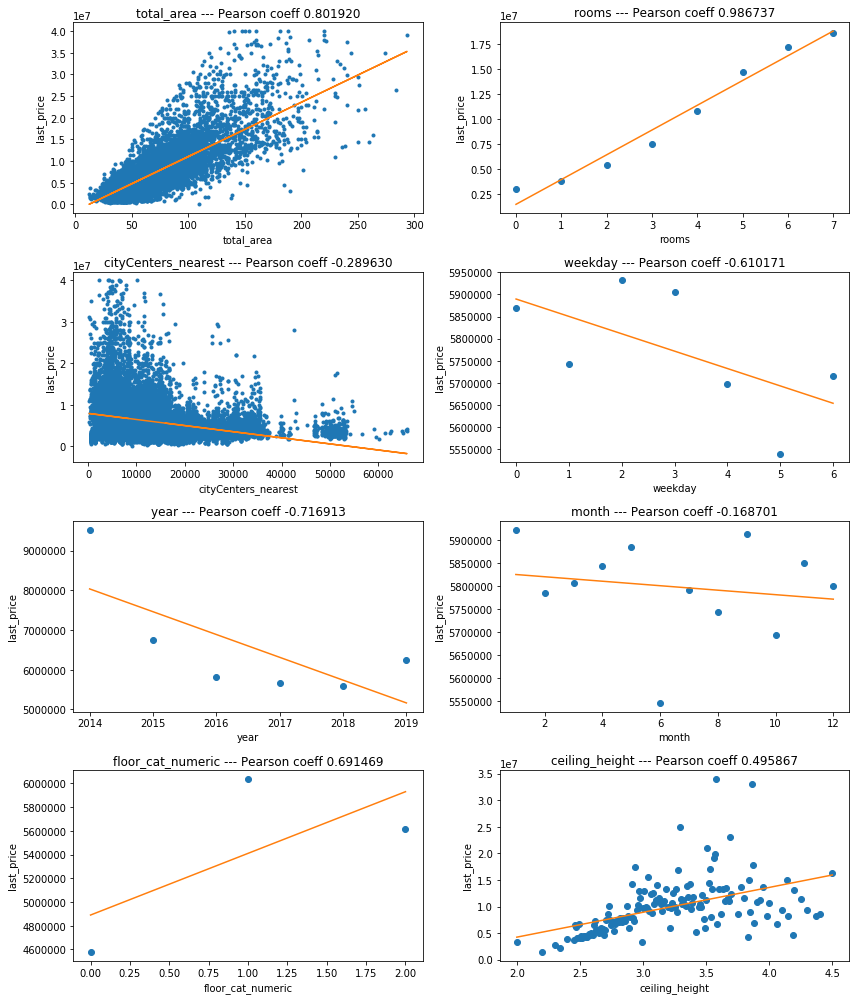

In [69]:
# Examine whether the value depends on the total square area, number of rooms, floor (top or bottom),
# or the proximity to the downtown area. 
# Also study the correlation to the publication date: day of the week, month, and year.

def floor_category_numeric(row):
    if row == 'first':
        return 0
    if row == 'other':
        return 1
    if row == 'last':
        return 2

df['floor_cat_numeric'] = df['floor_cat'].apply(floor_category_numeric)

def plotter(dataFrame):
    fig = plt.figure(figsize=(12, 14))

    analysis = ['total_area', 'rooms', 'cityCenters_nearest', 'weekday', 'year', 'month', 'floor_cat_numeric','ceiling_height']
    for i, num in zip(analysis, range(1,len(analysis)+1)):

        ax = fig.add_subplot(4,2,num)
        if i != 'total_area' and i != 'cityCenters_nearest':
            dataFrame_pivot = dataFrame.pivot_table(index=i, values='last_price')
            dataFrame_pivot.reset_index(inplace=True)
            ax.scatter(dataFrame_pivot[i], dataFrame_pivot['last_price'], marker='o')
            b, m = polyfit(dataFrame_pivot[i], dataFrame_pivot['last_price'], 1)
            ax.plot(dataFrame_pivot[i], dataFrame_pivot['last_price'], '.')
            ax.plot(dataFrame_pivot[i], b + m * dataFrame_pivot[i], '-')
            ax.set_title('%s --- Pearson coeff %f' % (i, dataFrame_pivot[i].corr(dataFrame_pivot['last_price'])))
            ax.set_xlabel(i)
            ax.set_ylabel('last_price')
        else:
            ax.scatter(dataFrame[i], dataFrame['last_price'], s=1)
            b, m = polyfit(dataFrame[i], dataFrame['last_price'], 1)
            ax.plot(dataFrame[i], dataFrame['last_price'], '.')
            ax.plot(dataFrame[i], b + m * dataFrame[i], '-')
            ax.set_title('%s --- Pearson coeff %f' % (i, dataFrame[i].corr(dataFrame['last_price'])))
            ax.set_xlabel(i)
            ax.set_ylabel('last_price')
            
    plt.tight_layout()
    plt.show()
            
plotter(df)

total area, number of rooms, floor have major impact on apartemnt price! High positive Pearson Correlation coefficient.
As expected (look at floor_cat_numeric plot) and remember that 0 = 1st floor, and 2nd = last - 
we can see that 1st and last floors are cheaper than other floors but last floor is a lot more expensive than 1st floor!


In terms of when to sell the apartemnt: flats sold on the weekend go for cheaper than those sold during the working days
Flats have been getting cheaper from 2014 to 2018 but pciked up in 2019 back to 2016 price level. It pretty much does not matter
in which of the month you sell the apartemnt - virtually no relationship between price and month sold.
As expected flats get cheaper as you get further away from the city centre - but somehwat surpisingly I expected a higher
negative Pearson coefficient but the value os -0.3 still tells us of fair dependence.

Increase in Ceiling Height (as expected) results in higher apartment price but substantially less influence than the 
total area, number of rooms, floor parameters.

Also, having calculated the mean prices for each room and ceiling height category yielded a more representative relationship between these parameters and the apartment price - in fact now, the number of rooms is the most influential parameter determing the apartment price!

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

In [70]:
# Select the 10 localities with the largest number of ads 
# then calculate the average price per square meter in these localities. 
print('10 localities with the largest number of ads are:\n\n', df.locality_name.value_counts().head(10))
print('----------------------------------------------------------------------------------------------------')

list_high_ads = df.locality_name.value_counts().head(10).index.to_list()
df_top_10_ads = df[df['locality_name'].isin(list_high_ads)]
df_top_10_ads_pivot = df_top_10_ads.pivot_table(index='locality_name', values='price_per_m2').astype('int')
df_top_10_ads_pivot = df_top_10_ads_pivot.sort_values(by = 'price_per_m2', ascending = False).head(10).astype('int')
df_top_10_ads_pivot.reset_index(inplace=True)
print('10 localities with the largest number of ads and their m2 price:\n\n', df_top_10_ads_pivot)
print('\nAverage price per square meter in these localities:', int(df_top_10_ads_pivot.price_per_m2.mean()))
print('----------------------------------------------------------------------------------------------------')





# Determine which ones have the highest and lowest housing prices. 
# You can find this data by name in the ’locality_name’ column.

df_pivot_locality = df.pivot_table(index='locality_name', values='price_per_m2')


df_pivot_locality_top10 = df_pivot_locality.sort_values(by = 'price_per_m2', ascending = False).head(10).astype('int')
df_pivot_locality_top10.reset_index(inplace=True)

print('\ntop 10 most expensive localities are:\n\n', df_pivot_locality_top10)
print('\nAverage price per m2 in top 10 expensive localities :', int(df_pivot_locality_top10.price_per_m2.mean()))


df_pivot_locality_bottom10 = df_pivot_locality.sort_values(by = 'price_per_m2', ascending = False).tail(10).astype('int')[::-1]
df_pivot_locality_bottom10.reset_index(inplace=True)
print('----------------------------------------------------------------------------------------------------')
print('\ntop 10 cheapest localities are:\n\n', df_pivot_locality_bottom10)
print('\nAverage price per m2 in top 10 cheapest localities :', int(df_pivot_locality_bottom10.price_per_m2.mean()))

10 localities with the largest number of ads are:

 Санкт-Петербург      14971
посёлок Мурино         517
посёлок Шушары         438
Всеволожск             396
Пушкин                 363
посёлок Парголово      326
Колпино                324
Гатчина                305
деревня Кудрово        296
Выборг                 237
Name: locality_name, dtype: int64
----------------------------------------------------------------------------------------------------
10 localities with the largest number of ads and their m2 price:

        locality_name  price_per_m2
0    Санкт-Петербург        110349
1             Пушкин        102796
2    деревня Кудрово         92325
3  посёлок Парголово         90211
4     посёлок Мурино         85644
5     посёлок Шушары         78577
6            Колпино         75307
7            Гатчина         68764
8         Всеволожск         67243
9             Выборг         58141

Average price per square meter in these localities: 82935
--------------------------------

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

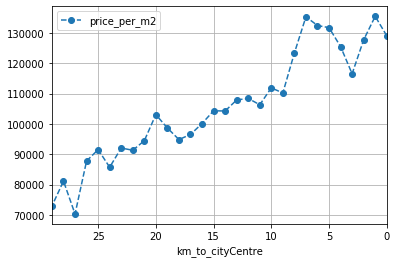

In [71]:
# Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
# Select apartments in Saint Petersburg (‘locality_name’). 
# Your task is to pinpoint which area is considered to be downtown. 
# In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. 
# Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. 
# Find a place on the graph where it shifts significantly. That's the downtown border.

# print(df.cityCenters_nearest)
df['km_to_cityCentre'] = (df['cityCenters_nearest'] / 1000).round(0).astype('int')


df_st_pet = df.query('locality_name == "Санкт-Петербург"')
df_st_pet_pivot = df_st_pet.pivot_table(index='km_to_cityCentre', values='price_per_m2')
df_st_pet_pivot.reset_index(inplace=True)

df_st_pet_pivot.plot(x = 'km_to_cityCentre', y = 'price_per_m2', grid = True,
                     linestyle='--', marker='o').invert_xaxis()



The most significant shift (steepest gradient) on the graph occurs around 8 and 3 km --> I say downtown border = 3 km as the 8 km mark is too far from the downtown.
Note the graph has inverted x axis so that it is more intuative to read.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

1074


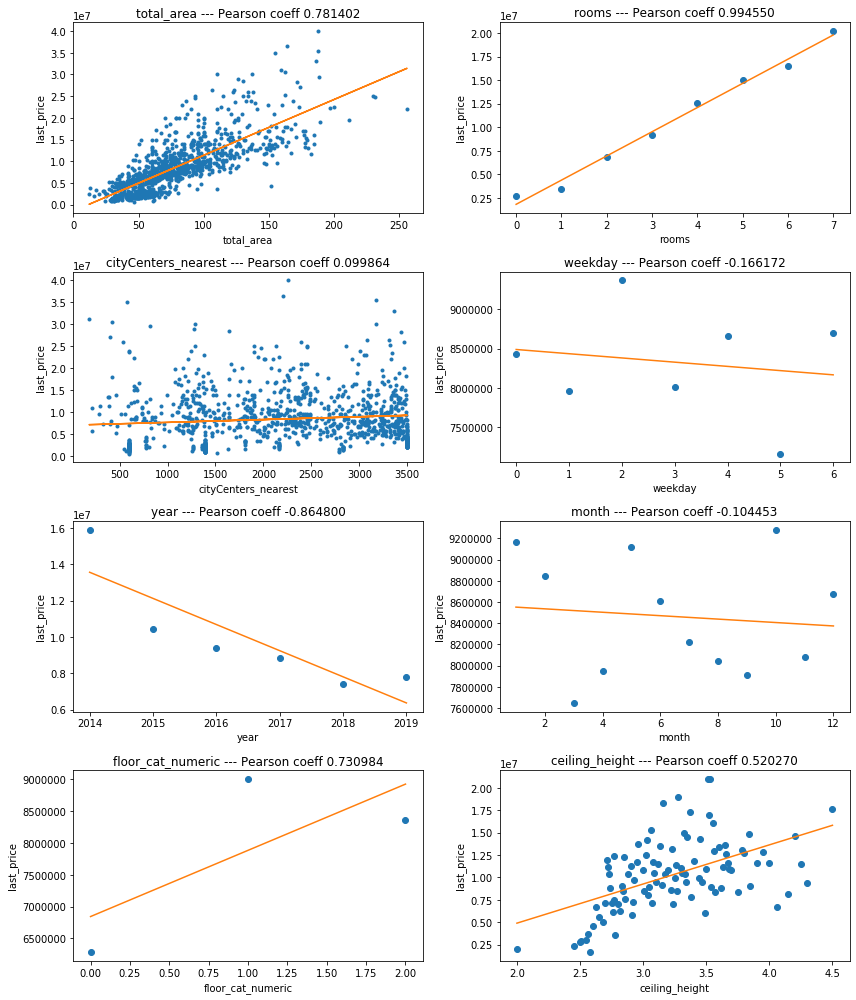

In [72]:
# Select all the apartments in the downtown and examine correlations between the following parameters: 
# total area, price, number of rooms, ceiling height. 
# Also identify the factors that affect an apartment’s price: 
# number of rooms, floor, distance to the downtown area, and ad publication date. 
# Draw your conclusions. Are they different from the overall deductions about the entire city?
df_downtown = df[(df['km_to_cityCentre'] <= 3)]
print(len(df_downtown))
plotter(df_downtown)

Mostly the same picture as with all other apartments: total area strongly affects the price, 
slightly lower with downtown apartments. Situation with the number of rooms, weekday, year, floor pretty much the same. 
Difference: As expected the distance to the city centre is irrelevant on downtown apartment price as you are already in the city centre. 

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

### Step 5. Overall conclusion


1) The top 5 parameters that have the biggest influence on St.Petersburg real estate are (in order by Pearson coeff):

        rooms --> 0.997 (note, averaged price per room --> pivot_table)
        total_area --> 0.802687
        iving_area -->  0.703059
        price_per_m2 --> 0.669394
        kitchen_area  --> 0.629066
        
        
2) Flats sold on the weekend tend to sell for lower price than those sold during working days

3) Flats have been decreasing in price from 2014 (start of Financial Crisis in Russia) to 2018 but increased in 2019

4) The locaility with the highest number of ads is Санкт-Петербург --> 14971 ads with price per m2 = 110349 rubles

5) Most Expensive locality is посёлок Лисий Нос with price per m2 = 121616 rubles

6) Cheapest locality is деревня Старополье with price per m2 = 11206 rubles

7) The downtown border was identified to be 3km from the city centre

8) The relationships between parameters stated in point 2 for downtown apartments are pretty much identical except that the distance to the city centre is irrelevant on downtown apartment price as you are already in the city centre. 


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

Please note that everytime you re-run my project you will get slightly different values because I am using random number genereation when filling in the missing data in some instances. So my comments when I talk about a specific number may mismatch from the real df numbers. I will consider this in the future and link my print statements with the value so the print is updated each time.

<div class="alert alert-block alert-info">
<h2> Comments 1 </h2>
</div>

Okay :)

------------

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square foot in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn